#**Importing Libraries**

In [129]:
import pandas as pd
import numpy as np

In [130]:
# Load the dataset from a CSV file
df = pd.read_csv("/content/House_Price_Dataset.csv")

In [131]:
df.head() #Display few rows

,URL,Address,bath rooms,bed rooms,built year,County,garage space,lot size,number of kitchen,Price,price per squar feet,property type,squarefeet,State
0,https://www.zillow.com/homedetails/234-Heise-C...,"234 Heise CRESCENT, Saskatoon, SK S7M 4Y8",3,3,Built in 1979,Division No. 11,Garage spaces: 1,"5,741 sqft lot",Description: Number of Kitchens: 1,"C$309,000",C$240/sqft,Single Family Residence,"1,290",Saskatchewan
1,https://www.zillow.com/homedetails/326-Ottawa-...,"326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1",2,4,Built in 1960,Division No. 11,Garage spaces: 2,"6,616 sqft lot",Description: Number of Kitchens: 1,"C$319,900",C$338/sqft,Single Family Residence,947,Saskatchewan
2,https://www.zillow.com/homedetails/1019-Lansdo...,"1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2",2,4,Built in 1946,Division No. 11,Has uncovered spaces: Yes,"4,199 sqft lot",Description: Number of Kitchens: 2,"C$450,000",C$551/sqft,Single Family Residence,816,Saskatchewan
3,https://www.zillow.com/homedetails/107-Brookda...,"107 Brookdale CRESCENT, Saskatoon, SK S7V 1K5",3,3,Built in 2006,Division No. 11,Attached garage spaces: 2,"6,128 sqft lot",Description: Number of Kitchens: 1,"C$569,000",C$317/sqft,Retail,"1,795",Saskatchewan
4,https://www.zillow.com/homedetails/1208-6th-Av...,"1208 6th AVENUE N, Saskatoon, SK S7K 2T5",4,4,Built in 2006,Division No. 11,Garage spaces: 2,"3,245 sqft lot",Description: Number of Kitchens: 1,"C$465,000",C$344/sqft,Retail,"1,350",Saskatchewan


#**Checking total number of record**

In [132]:
df_length = len(df) # Calculate the total number of rows in the dataset

In [133]:
print(df_length) # Print the total number of rows in the dataset

1571


#**Checking Shape of the dataset**

In [134]:
df.shape # Display the shape of the dataset (number of rows and columns)

(1571, 14)

#**Summary statistics for numerical columns in the dataset**

In [135]:
df.describe() # Display summary statistics for numerical columns in the dataset

,URL,Address,bath rooms,bed rooms,built year,County,garage space,lot size,number of kitchen,Price,price per squar feet,property type,squarefeet,State
count,1571,1571,1571,1571,1571,1571,1403,1571,1516,1571,1571,1571,1571,1571
unique,1463,1463,8,12,116,2,40,535,17,588,435,10,893,1
top,https://www.zillow.com/homedetails/874-N-Seymo...,"874 Seymour CRESCENT N, Regina, SK S4X 2G4",2,3,Built in 2024,Division No. 6,Attached garage spaces: 2,-- sqft lot,Description: Number of Kitchens: 1,"C$329,900",C$--/sqft,Single Family Residence,--,Saskatchewan
freq,4,4,523,456,86,831,319,610,1272,28,75,629,14,1571


#**Drop the 'URL' and 'County' columns from the dataset**

In [136]:
df = df.drop(columns=["URL", "County"]) # Drop the 'URL' and 'County' columns from the dataset

In [137]:
df.head() #Display few rows

,Address,bath rooms,bed rooms,built year,garage space,lot size,number of kitchen,Price,price per squar feet,property type,squarefeet,State
0,"234 Heise CRESCENT, Saskatoon, SK S7M 4Y8",3,3,Built in 1979,Garage spaces: 1,"5,741 sqft lot",Description: Number of Kitchens: 1,"C$309,000",C$240/sqft,Single Family Residence,"1,290",Saskatchewan
1,"326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1",2,4,Built in 1960,Garage spaces: 2,"6,616 sqft lot",Description: Number of Kitchens: 1,"C$319,900",C$338/sqft,Single Family Residence,947,Saskatchewan
2,"1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2",2,4,Built in 1946,Has uncovered spaces: Yes,"4,199 sqft lot",Description: Number of Kitchens: 2,"C$450,000",C$551/sqft,Single Family Residence,816,Saskatchewan
3,"107 Brookdale CRESCENT, Saskatoon, SK S7V 1K5",3,3,Built in 2006,Attached garage spaces: 2,"6,128 sqft lot",Description: Number of Kitchens: 1,"C$569,000",C$317/sqft,Retail,"1,795",Saskatchewan
4,"1208 6th AVENUE N, Saskatoon, SK S7K 2T5",4,4,Built in 2006,Garage spaces: 2,"3,245 sqft lot",Description: Number of Kitchens: 1,"C$465,000",C$344/sqft,Retail,"1,350",Saskatchewan


In [138]:
df.shape # Display the updated shape of the dataset (number of rows and columns)

(1571, 12)

#**Cleaning price column**

In [139]:
print(df['Price'].dtype) # Print the data type of the 'Price' column

object


#**Remove commas and the currency symbol, and convert the 'Price' column to a float data type**

In [140]:
#Remove commas and the currency symbol, and convert the 'Price' column to a float data type
df['Price'] = df['Price'].str.replace('C$', '').str.replace(',', '').astype(float)

In [141]:
print(df['Price'].dtype)

float64


In [142]:
df.head() #Display the rows

,Address,bath rooms,bed rooms,built year,garage space,lot size,number of kitchen,Price,price per squar feet,property type,squarefeet,State
0,"234 Heise CRESCENT, Saskatoon, SK S7M 4Y8",3,3,Built in 1979,Garage spaces: 1,"5,741 sqft lot",Description: Number of Kitchens: 1,309000.0,C$240/sqft,Single Family Residence,"1,290",Saskatchewan
1,"326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1",2,4,Built in 1960,Garage spaces: 2,"6,616 sqft lot",Description: Number of Kitchens: 1,319900.0,C$338/sqft,Single Family Residence,947,Saskatchewan
2,"1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2",2,4,Built in 1946,Has uncovered spaces: Yes,"4,199 sqft lot",Description: Number of Kitchens: 2,450000.0,C$551/sqft,Single Family Residence,816,Saskatchewan
3,"107 Brookdale CRESCENT, Saskatoon, SK S7V 1K5",3,3,Built in 2006,Attached garage spaces: 2,"6,128 sqft lot",Description: Number of Kitchens: 1,569000.0,C$317/sqft,Retail,"1,795",Saskatchewan
4,"1208 6th AVENUE N, Saskatoon, SK S7K 2T5",4,4,Built in 2006,Garage spaces: 2,"3,245 sqft lot",Description: Number of Kitchens: 1,465000.0,C$344/sqft,Retail,"1,350",Saskatchewan


#**Remove commas and convert to numeric, forcing errors to NaN in square feet column**

In [143]:
# Remove commas and convert to numeric, forcing errors to NaN
df['squarefeet'] = pd.to_numeric(df['squarefeet'].str.replace(',', ''), errors='coerce')


In [144]:
df.head() #Display the rows

,Address,bath rooms,bed rooms,built year,garage space,lot size,number of kitchen,Price,price per squar feet,property type,squarefeet,State
0,"234 Heise CRESCENT, Saskatoon, SK S7M 4Y8",3,3,Built in 1979,Garage spaces: 1,"5,741 sqft lot",Description: Number of Kitchens: 1,309000.0,C$240/sqft,Single Family Residence,1290.0,Saskatchewan
1,"326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1",2,4,Built in 1960,Garage spaces: 2,"6,616 sqft lot",Description: Number of Kitchens: 1,319900.0,C$338/sqft,Single Family Residence,947.0,Saskatchewan
2,"1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2",2,4,Built in 1946,Has uncovered spaces: Yes,"4,199 sqft lot",Description: Number of Kitchens: 2,450000.0,C$551/sqft,Single Family Residence,816.0,Saskatchewan
3,"107 Brookdale CRESCENT, Saskatoon, SK S7V 1K5",3,3,Built in 2006,Attached garage spaces: 2,"6,128 sqft lot",Description: Number of Kitchens: 1,569000.0,C$317/sqft,Retail,1795.0,Saskatchewan
4,"1208 6th AVENUE N, Saskatoon, SK S7K 2T5",4,4,Built in 2006,Garage spaces: 2,"3,245 sqft lot",Description: Number of Kitchens: 1,465000.0,C$344/sqft,Retail,1350.0,Saskatchewan


#**Display unique property types in the dataset**

In [145]:
df['property type'].unique() # Display unique property types in the dataset

array(['Single Family Residence', 'Retail', 'Condominium', 'Duplex',
       'Townhouse', 'Manufactured Home', 'Warehouse', 'Unimproved Land',
       'Multi Family', 'Quadruplex'], dtype=object)

#**Renaming column name for readability**

In [146]:
df = df.rename(columns={
    "bath rooms": "Bathrooms",
    "bed rooms": "Bedrooms",
    "built year": "Built Year",
    "garage space": "Garage Space",
    "lot size": "Lot Size (sqft)",
    "number of kitchen": "Kitchens",
    "price per squar feet": "Price per Sqft",
    "property type": "Property Type",
    "squarefeet": "Square Feet"
})

In [147]:
df.head() #Display the rows

,Address,Bathrooms,Bedrooms,Built Year,Garage Space,Lot Size (sqft),Kitchens,Price,Price per Sqft,Property Type,Square Feet,State
0,"234 Heise CRESCENT, Saskatoon, SK S7M 4Y8",3,3,Built in 1979,Garage spaces: 1,"5,741 sqft lot",Description: Number of Kitchens: 1,309000.0,C$240/sqft,Single Family Residence,1290.0,Saskatchewan
1,"326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1",2,4,Built in 1960,Garage spaces: 2,"6,616 sqft lot",Description: Number of Kitchens: 1,319900.0,C$338/sqft,Single Family Residence,947.0,Saskatchewan
2,"1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2",2,4,Built in 1946,Has uncovered spaces: Yes,"4,199 sqft lot",Description: Number of Kitchens: 2,450000.0,C$551/sqft,Single Family Residence,816.0,Saskatchewan
3,"107 Brookdale CRESCENT, Saskatoon, SK S7V 1K5",3,3,Built in 2006,Attached garage spaces: 2,"6,128 sqft lot",Description: Number of Kitchens: 1,569000.0,C$317/sqft,Retail,1795.0,Saskatchewan
4,"1208 6th AVENUE N, Saskatoon, SK S7K 2T5",4,4,Built in 2006,Garage spaces: 2,"3,245 sqft lot",Description: Number of Kitchens: 1,465000.0,C$344/sqft,Retail,1350.0,Saskatchewan


#**Checking types of columns**

In [148]:
# Identify columns with categorical data (dtype == 'object')
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

# Identify columns with integer data (dtype == 'int')
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

# Identify columns with float data (dtype == 'float')
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 10
Integer variables: 0
Float variables: 2


#**Display unique values in the 'Price per Sqft' column**

In [149]:
df['Price per Sqft'].unique() # Display unique values in the 'Price per Sqft' column

array(['C$240/sqft', 'C$338/sqft', 'C$551/sqft', 'C$317/sqft',
       'C$344/sqft', 'C$372/sqft', 'C$351/sqft', 'C$270/sqft',
       'C$300/sqft', 'C$273/sqft', 'C$313/sqft', 'C$255/sqft',
       'C$266/sqft', 'C$188/sqft', 'C$312/sqft', 'C$174/sqft',
       'C$327/sqft', 'C$320/sqft', 'C$314/sqft', 'C$246/sqft',
       'C$424/sqft', 'C$488/sqft', 'C$288/sqft', 'C$380/sqft',
       'C$214/sqft', 'C$763/sqft', 'C$512/sqft', 'C$212/sqft',
       'C$287/sqft', 'C$328/sqft', 'C$294/sqft', 'C$318/sqft',
       'C$382/sqft', 'C$437/sqft', 'C$241/sqft', 'C$452/sqft',
       'C$200/sqft', 'C$272/sqft', 'C$349/sqft', 'C$324/sqft',
       'C$335/sqft', 'C$418/sqft', 'C$207/sqft', 'C$319/sqft',
       'C$537/sqft', 'C$332/sqft', 'C$370/sqft', 'C$420/sqft',
       'C$252/sqft', 'C$398/sqft', 'C$249/sqft', 'C$542/sqft',
       'C$384/sqft', 'C$225/sqft', 'C$342/sqft', 'C$196/sqft',
       'C$438/sqft', 'C$764/sqft', 'C$409/sqft', 'C$394/sqft',
       'C$383/sqft', 'C$161/sqft', 'C$358/sqft', 'C$329

#**Display summary information about the dataset**

In [150]:
df.info()# Display summary information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          1571 non-null   object 
 1   Bathrooms        1571 non-null   object 
 2   Bedrooms         1571 non-null   object 
 3   Built Year       1571 non-null   object 
 4   Garage Space     1403 non-null   object 
 5   Lot Size (sqft)  1571 non-null   object 
 6   Kitchens         1516 non-null   object 
 7   Price            1571 non-null   float64
 8   Price per Sqft   1571 non-null   object 
 9   Property Type    1571 non-null   object 
 10  Square Feet      1557 non-null   float64
 11  State            1571 non-null   object 
dtypes: float64(2), object(10)
memory usage: 147.4+ KB


#**Replace empty strings in the DataFrame with NaN values**

In [151]:
df.replace("", np.nan, inplace=True) # Replace empty strings in the DataFrame with NaN values

In [153]:
# Display value counts for each column in the dataset
for column in df.columns:
    print(df[column].value_counts())
    print("*"*20)

Address
874 Seymour CRESCENT N, Regina, SK S4X 2G4                4
UNIT 211-2311 Windsor Park ROAD, Regina, SK S4V 1S2       4
714 Callander CRESCENT N, Regina, SK S4X 2B4              4
2100 Courtney STREET, Regina, SK X0X 0X0                  4
5116 Buckingham DRIVE E, Regina, SK S4V 3W2               3
                                                         ..
UNIT 303-1005 9th STREET E, Saskatoon, SK S7H 0N3         1
923 Brookhurst LANE, Saskatoon, SK S7V 1G6                1
UNIT 903-902 Spadina CRESCENT E, Saskatoon, SK S7K 0G8    1
UNIT 75-651 Dubois CRESCENT, Saskatoon, SK S7V 0R3        1
2023 Ottawa STREET, Regina, SK S4P 1P9                    1
Name: count, Length: 1463, dtype: int64
********************
Bathrooms
2     523
3     376
1     336
4     227
--     75
5      26
0       4
6       4
Name: count, dtype: int64
********************
Bedrooms
3     456
4     359
2     327
5     193
1      93
--     75
6      46
7      11
8       5
0       4
10      1
15      1
Name:

#**Replace placeholder text 'Built in ----' in the 'Built Year' column with NaN values**

In [154]:
df['Built Year'] = df['Built Year'].replace('Built in ----', np.nan) # Replace placeholder text 'Built in ----' in the 'Built Year' column with NaN values

In [155]:
print(df['Built Year'].value_counts())

Built Year
Built in 2024    86
Built in 2013    62
Built in 2014    45
Built in 2012    42
Built in 2015    36
                 ..
Built in 1917     1
Built in 1989     1
Built in 1932     1
Built in 1997     1
Built in 1919     1
Name: count, Length: 115, dtype: int64


In [156]:
print(df['Built Year'].isnull().sum())

63


#**Checking null values in a dataframe**





In [157]:
print(df[df['Built Year'].isnull()])

                                           Address Bathrooms Bedrooms  \
430         1222 B AVENUE N, Saskatoon, SK S7L 1X3         2        4   
436   1630 Wiggins AVENUE S, Saskatoon, SK S7H 2J9        --       --   
690       5 Connaught PLACE, Saskatoon, SK S7L 1C7        --       --   
713       222 24th STREET W, Saskatoon, SK S7L 0B5        --       --   
714      1401 Cairns AVENUE, Saskatoon, SK S7H 2H3        --       --   
...                                            ...       ...      ...   
1507      1335 Robinson STREET, Regina, SK S4T 2N5        --       --   
1508        1202 Garnet STREET, Regina, SK S4T 2Z4        --       --   
1509       1324 Empress STREET, Regina, SK S4T 5E5        --       --   
1510          6501 28th AVENUE, Regina, SK S4W 0L3        --       --   
1560       2322 ST JOHN STREET, Regina, SK S4P 0W5        --       --   

     Built Year                                       Garage Space  \
430         NaN                          Has uncovere

#**Remove the "Built in" prefix from the values in the "Built Year" column**

In [158]:
df['Built Year'] = df['Built Year'].str.replace('Built in ', '')

In [159]:
df.head()

,Address,Bathrooms,Bedrooms,Built Year,Garage Space,Lot Size (sqft),Kitchens,Price,Price per Sqft,Property Type,Square Feet,State
0,"234 Heise CRESCENT, Saskatoon, SK S7M 4Y8",3,3,1979,Garage spaces: 1,"5,741 sqft lot",Description: Number of Kitchens: 1,309000.0,C$240/sqft,Single Family Residence,1290.0,Saskatchewan
1,"326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1",2,4,1960,Garage spaces: 2,"6,616 sqft lot",Description: Number of Kitchens: 1,319900.0,C$338/sqft,Single Family Residence,947.0,Saskatchewan
2,"1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2",2,4,1946,Has uncovered spaces: Yes,"4,199 sqft lot",Description: Number of Kitchens: 2,450000.0,C$551/sqft,Single Family Residence,816.0,Saskatchewan
3,"107 Brookdale CRESCENT, Saskatoon, SK S7V 1K5",3,3,2006,Attached garage spaces: 2,"6,128 sqft lot",Description: Number of Kitchens: 1,569000.0,C$317/sqft,Retail,1795.0,Saskatchewan
4,"1208 6th AVENUE N, Saskatoon, SK S7K 2T5",4,4,2006,Garage spaces: 2,"3,245 sqft lot",Description: Number of Kitchens: 1,465000.0,C$344/sqft,Retail,1350.0,Saskatchewan


#**Extract numeric values from the "Garage Space" column**

In [160]:
import re

# Extract the first numeric value from each entry in the 'Garage Space' column
df['Garage Space'] = df['Garage Space'].apply(lambda x: re.search(r'\d+', x).group() if pd.notnull(x) and re.search(r'\d+', x) else x)

In [161]:
df.head()

,Address,Bathrooms,Bedrooms,Built Year,Garage Space,Lot Size (sqft),Kitchens,Price,Price per Sqft,Property Type,Square Feet,State
0,"234 Heise CRESCENT, Saskatoon, SK S7M 4Y8",3,3,1979,1,"5,741 sqft lot",Description: Number of Kitchens: 1,309000.0,C$240/sqft,Single Family Residence,1290.0,Saskatchewan
1,"326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1",2,4,1960,2,"6,616 sqft lot",Description: Number of Kitchens: 1,319900.0,C$338/sqft,Single Family Residence,947.0,Saskatchewan
2,"1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2",2,4,1946,Has uncovered spaces: Yes,"4,199 sqft lot",Description: Number of Kitchens: 2,450000.0,C$551/sqft,Single Family Residence,816.0,Saskatchewan
3,"107 Brookdale CRESCENT, Saskatoon, SK S7V 1K5",3,3,2006,2,"6,128 sqft lot",Description: Number of Kitchens: 1,569000.0,C$317/sqft,Retail,1795.0,Saskatchewan
4,"1208 6th AVENUE N, Saskatoon, SK S7K 2T5",4,4,2006,2,"3,245 sqft lot",Description: Number of Kitchens: 1,465000.0,C$344/sqft,Retail,1350.0,Saskatchewan


#**Extract the numeric value from Garage Space Column**


In [162]:
import re

# Define a function to extract the numeric value from a string
def extract_numeric_value(s):
    if isinstance(s, str):
        match = re.search(r'\d+(\.\d+)?', s)
        if match:
            return float(match.group())
        else:
            return 1
    else:
        return s

# Extract numeric values from the "Garage Space" column
df['Garage Space'] = df['Garage Space'].apply(extract_numeric_value)


In [164]:
print(df['Garage Space'])

0       1.0
1       2.0
2       1.0
3       2.0
4       2.0
       ... 
1566    1.0
1567    1.0
1568    1.0
1569    2.0
1570    6.0
Name: Garage Space, Length: 1571, dtype: float64


In [165]:
df['Garage Space'].value_counts()

,count
Garage Space,
1.0,691
2.0,576
3.0,57
0.0,48
4.0,10
6.0,5
25.0,4
8.0,3
35.0,2


In [166]:
!pip install seaborn

#**Visualize outliers in garage spaces**

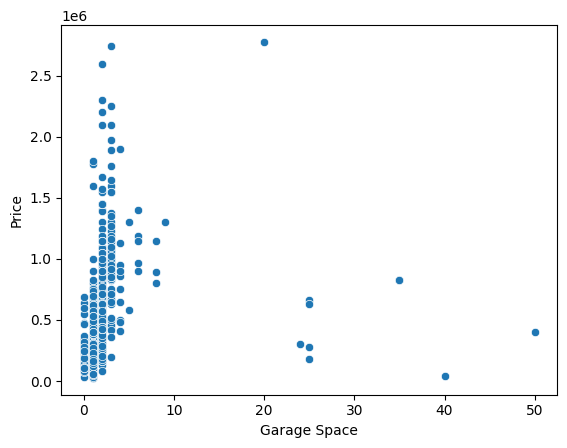

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot of "Garage Space" against "Price"
sns.scatterplot(x=df['Garage Space'], y=df['Price'])

# Show the plot
plt.show()

In [168]:
df["Garage Space"].value_counts()

,count
Garage Space,
1.0,691
2.0,576
3.0,57
0.0,48
4.0,10
6.0,5
25.0,4
8.0,3
35.0,2


#**Replace values in 'Garage Space' column for handling outlier**

In [169]:
# Transform 'Garage Space' values based on specific conditions
df['Garage Space'] = df['Garage Space'].apply(lambda x: 3 if x in [5, 6] else (2 if x > 6 else x))

In [170]:
df["Garage Space"].value_counts()

,count
Garage Space,
1.0,691
2.0,590
3.0,64
0.0,48
4.0,10


In [171]:
# Check if any rows contain the value 1.732716 in the "Garage Space" column
print(df[df['Garage Space'].isin([1.732716])])

Empty DataFrame
Columns: [Address, Bathrooms, Bedrooms, Built Year, Garage Space, Lot Size (sqft), Kitchens, Price, Price per Sqft, Property Type, Square Feet, State]
Index: []


#**Visualize outliers in the 'Garage Space' column**

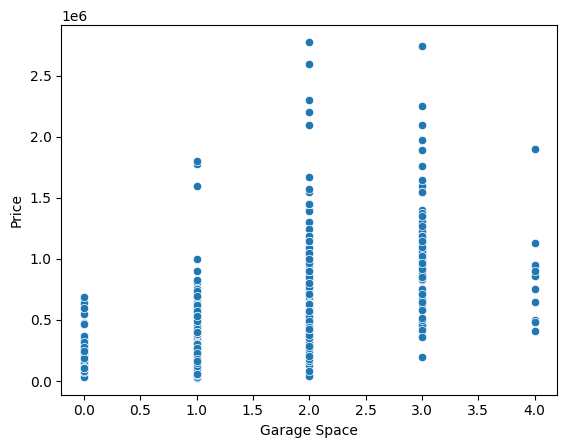

In [172]:
sns.scatterplot(x=df['Garage Space'], y=df['Price'])
# Show the plot
plt.show()

#**Check if there are any empty or missing values in the "Built Year" column**

In [173]:
# Count the number of rows with empty or missing values in the 'Built Year' column
print(df['Built Year'].apply(lambda x: x == '' or pd.isnull(x)).sum())

63


In [174]:
# Get the rows that contain empty or missing values in the "Built Year" column
missing_values = df[df['Built Year'].apply(lambda x: x == '' or pd.isnull(x))]

# Print the rows that contain empty or missing values in the "Built Year" column
print(missing_values)


                                           Address Bathrooms Bedrooms  \
430         1222 B AVENUE N, Saskatoon, SK S7L 1X3         2        4   
436   1630 Wiggins AVENUE S, Saskatoon, SK S7H 2J9        --       --   
690       5 Connaught PLACE, Saskatoon, SK S7L 1C7        --       --   
713       222 24th STREET W, Saskatoon, SK S7L 0B5        --       --   
714      1401 Cairns AVENUE, Saskatoon, SK S7H 2H3        --       --   
...                                            ...       ...      ...   
1507      1335 Robinson STREET, Regina, SK S4T 2N5        --       --   
1508        1202 Garnet STREET, Regina, SK S4T 2Z4        --       --   
1509       1324 Empress STREET, Regina, SK S4T 5E5        --       --   
1510          6501 28th AVENUE, Regina, SK S4W 0L3        --       --   
1560       2322 ST JOHN STREET, Regina, SK S4P 0W5        --       --   

     Built Year  Garage Space Lot Size (sqft)  \
430         NaN           1.0  6,198 sqft lot   
436         NaN          

In [175]:
print(df["Built Year"].value_counts(dropna=False)) # Get the full value count of the "Built Year" column

Built Year
2024    86
NaN     63
2013    62
2014    45
2012    42
        ..
1932     1
1906     1
1940     1
1907     1
1919     1
Name: count, Length: 116, dtype: int64


#**Checking columns and raws with maximum number of null values**

In [176]:
# Create a boolean mask of the DataFrame that indicates which values are null
null_mask = df.isnull()

# Count the number of null values in each column
column_null_counts = null_mask.sum()

# Count the number of null values in each row
row_null_counts = null_mask.sum(axis=1)

# Get the column with the most null values
max_column_null_count = column_null_counts.max()
max_column = column_null_counts[column_null_counts == max_column_null_count].index[0]

# Get the row with the most null values
max_row_null_count = row_null_counts.max()
max_row = row_null_counts[row_null_counts == max_row_null_count].index[0]

# Print the column and row with the most null values
print(f"Column with the most null values: {max_column} ({max_column_null_count} null values)")
print(f"Row with the most null values: {max_row} ({max_row_null_count} null values)")


Column with the most null values: Garage Space (168 null values)
Row with the most null values: 713 (3 null values)


#**Fill null values in the "Garage Space" column with the value 2**

In [177]:
# Fill null values in the "Garage Space" column with the value 2
df['Garage Space'] = df['Garage Space'].fillna(2)

In [178]:
df['Garage Space'].count()

1571

#**Checking total values in garage space without empty or null values**

In [179]:
# Get the total number of non-null and non-empty values in the "Garage Space" column
total_values = df['Garage Space'].dropna().replace('', np.nan).dropna().count()

# Print the total number of non-null and non-empty values in the "Garage Space" column
print(f"Total number of non-null and non-empty values in the Garage Space column: {total_values}")


Total number of non-null and non-empty values in the Garage Space column: 1571


In [180]:
df.head()

,Address,Bathrooms,Bedrooms,Built Year,Garage Space,Lot Size (sqft),Kitchens,Price,Price per Sqft,Property Type,Square Feet,State
0,"234 Heise CRESCENT, Saskatoon, SK S7M 4Y8",3,3,1979,1.0,"5,741 sqft lot",Description: Number of Kitchens: 1,309000.0,C$240/sqft,Single Family Residence,1290.0,Saskatchewan
1,"326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1",2,4,1960,2.0,"6,616 sqft lot",Description: Number of Kitchens: 1,319900.0,C$338/sqft,Single Family Residence,947.0,Saskatchewan
2,"1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2",2,4,1946,1.0,"4,199 sqft lot",Description: Number of Kitchens: 2,450000.0,C$551/sqft,Single Family Residence,816.0,Saskatchewan
3,"107 Brookdale CRESCENT, Saskatoon, SK S7V 1K5",3,3,2006,2.0,"6,128 sqft lot",Description: Number of Kitchens: 1,569000.0,C$317/sqft,Retail,1795.0,Saskatchewan
4,"1208 6th AVENUE N, Saskatoon, SK S7K 2T5",4,4,2006,2.0,"3,245 sqft lot",Description: Number of Kitchens: 1,465000.0,C$344/sqft,Retail,1350.0,Saskatchewan


#**Cleaning lot size (sqft)**

In [181]:
df["Lot Size (sqft)"].value_counts()

,count
Lot Size (sqft),
-- sqft lot,610
"3,123 sqft lot",65
"3,118 sqft lot",34
"3,127 sqft lot",22
"6,250 sqft lot",13
...,...
"2,081 sqft lot",1
"9,064 sqft lot",1
"8,145 sqft lot",1


#**Remove the "sqft lot" text and commas from the "Lot Size (sqft)" column**

In [182]:
# Clean the 'Lot Size (sqft)' column by removing the text ' sqft lot' and commas
df["Lot Size (sqft)"] = df["Lot Size (sqft)"].str.replace(" sqft lot", "").str.replace(",", "")

In [183]:
df["Lot Size (sqft)"].value_counts()

,count
Lot Size (sqft),
--,610
3123,65
3118,34
3127,22
6250,13
...,...
2081,1
9064,1
8145,1


#**Check if the "Lot Size (sqft)" column contains any values in acres**

In [184]:
# Identify rows where 'Lot Size (sqft)' contains the term "Acres"
acres_values = df["Lot Size (sqft)"].str.contains("Acres")

# Print the rows that contain values in acres
print(df.loc[acres_values])

                                                Address Bathrooms Bedrooms  \
102          1226 Beechmont VIEW, Saskatoon, SK S7V 1E2         4        3   
192           138 Highbury PLACE, Saskatoon, SK S7H 4X7         4        4   
266              43 Jordan PLACE, Saskatoon, SK S7L 4J2         3        4   
267         870 University DRIVE, Saskatoon, SK S7N 0J7         4        5   
312             415 Braeside BAY, Saskatoon, SK S7V 1A3         3        4   
354         1530 Pohorecky COURT, Saskatoon, SK S7S 1N1         4        5   
420    UNIT 226-1220 Pringle WAY, Saskatoon, SK S7T 0X5         3        3   
422         621 Brookhurst COURT, Saskatoon, SK S7V 1E5         4        5   
435             3445 Caen STREET, Saskatoon, SK S7M 3P5         4        4   
467           3341 Dieppe STREET, Saskatoon, SK S7M 3S6         4        5   
482      2126 Ste Cecilia AVENUE, Saskatoon, SK S7M 0P2         2        6   
630               116 U AVENUE N, Saskatoon, SK S7L 3C3         

In [185]:
df.head()

,Address,Bathrooms,Bedrooms,Built Year,Garage Space,Lot Size (sqft),Kitchens,Price,Price per Sqft,Property Type,Square Feet,State
0,"234 Heise CRESCENT, Saskatoon, SK S7M 4Y8",3,3,1979,1.0,5741,Description: Number of Kitchens: 1,309000.0,C$240/sqft,Single Family Residence,1290.0,Saskatchewan
1,"326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1",2,4,1960,2.0,6616,Description: Number of Kitchens: 1,319900.0,C$338/sqft,Single Family Residence,947.0,Saskatchewan
2,"1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2",2,4,1946,1.0,4199,Description: Number of Kitchens: 2,450000.0,C$551/sqft,Single Family Residence,816.0,Saskatchewan
3,"107 Brookdale CRESCENT, Saskatoon, SK S7V 1K5",3,3,2006,2.0,6128,Description: Number of Kitchens: 1,569000.0,C$317/sqft,Retail,1795.0,Saskatchewan
4,"1208 6th AVENUE N, Saskatoon, SK S7K 2T5",4,4,2006,2.0,3245,Description: Number of Kitchens: 1,465000.0,C$344/sqft,Retail,1350.0,Saskatchewan


In [186]:
# Print the NaN values in the "Lot Size (sqft)" column
df["Lot Size (sqft)"].unique()


array(['5741', '6616', '4199', '6128', '3245', '--', '5597', '5497',
       '5244', '6037', '5083', '6242', '3105', '7000', '6586', '5662',
       '8245', '6490', '6542', '5445', '7148', '8738', '5671', '6634',
       '4046', '5889', '5989', '7074', '4578', '4917', '4395', '6098',
       '4077', '7296', '7840', '3293', '5549', '8394', '7200', '4299',
       '8842', '7270', '8938', '7897', '6777', '2927', '3750', '6028',
       '3598', '4547', '4399', '5950', '6547', '5588', '7248', '6080',
       '5427', '5575', '0.28 Acres lot', '5566', '2657', '6216', '4460',
       '3772', '6019', '6120', '3624', '9740', '4835', '4356', '3706',
       '5370', '5906', '3188', '3998', '3968', '2081', '6769', '9064',
       '8276', '8145', '3480', '7021', '9574', '8999', '5972', '6812',
       '4856', '4517', '3659', '5205', '3497', '5449', '6669', '4613',
       '6821', '6394', '0.30 Acres lot', '4748', '6899', '6995', '5388',
       '5492', '10728', '5758', '5898', '6050', '4247', '8001', '5262',
   

In [187]:
# Count the number of occurrences of the value '--' in the "Lot Size (sqft)" column
count = df["Lot Size (sqft)"].value_counts()["--"]
print("Number of occurrences of '--' in the Lot Size (sqft) column:", count)


Number of occurrences of '--' in the Lot Size (sqft) column: 610


#**Dropping lot size column(contains lot of null values)**

In [188]:
# Drop the "Lot Size (sqft)" column
df = df.drop("Lot Size (sqft)", axis=1)

In [189]:
df.head()

,Address,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Price per Sqft,Property Type,Square Feet,State
0,"234 Heise CRESCENT, Saskatoon, SK S7M 4Y8",3,3,1979,1.0,Description: Number of Kitchens: 1,309000.0,C$240/sqft,Single Family Residence,1290.0,Saskatchewan
1,"326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1",2,4,1960,2.0,Description: Number of Kitchens: 1,319900.0,C$338/sqft,Single Family Residence,947.0,Saskatchewan
2,"1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2",2,4,1946,1.0,Description: Number of Kitchens: 2,450000.0,C$551/sqft,Single Family Residence,816.0,Saskatchewan
3,"107 Brookdale CRESCENT, Saskatoon, SK S7V 1K5",3,3,2006,2.0,Description: Number of Kitchens: 1,569000.0,C$317/sqft,Retail,1795.0,Saskatchewan
4,"1208 6th AVENUE N, Saskatoon, SK S7K 2T5",4,4,2006,2.0,Description: Number of Kitchens: 1,465000.0,C$344/sqft,Retail,1350.0,Saskatchewan


#**Check for null values in the "Bedrooms" and "Bathrooms" columns**

In [190]:
# Check for null values in the "Bedrooms" and "Bathrooms" columns
null_values = df[["Bedrooms", "Bathrooms"]].isnull().sum()

# Check for empty values in the "Bedrooms" and "Bathrooms" columns
empty_values = df[["Bedrooms", "Bathrooms"]].applymap(lambda x: x == "").sum()

# Print the number of null and empty values in each column
print("Null values:\n", null_values)
print("Empty values:\n", empty_values)


Null values:
 Bedrooms     0
Bathrooms    0
dtype: int64
Empty values:
 Bedrooms     0
Bathrooms    0
dtype: int64


<ipython-input-190-bcfe907ac435>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_values = df[["Bedrooms", "Bathrooms"]].applymap(lambda x: x == "").sum()


#**Replace the missing values with NaN**

In [191]:
df["Bedrooms"] = df["Bedrooms"].replace("--", np.nan)
df["Bathrooms"] = df["Bathrooms"].replace("--", np.nan)

# Convert the columns to numeric data types
df["Bedrooms"] = pd.to_numeric(df["Bedrooms"])
df["Bathrooms"] = pd.to_numeric(df["Bathrooms"])


#**Convert the "Bathrooms" and "Bedrooms" columns to numeric data types**

In [192]:
df["Bathrooms"] = pd.to_numeric(df["Bathrooms"])
df["Bedrooms"] = pd.to_numeric(df["Bedrooms"])

#**Calculate the IQR for the "Bedrooms" column to detect outliers**

In [193]:

Q1_bedrooms = df["Bedrooms"].quantile(0.25)
Q3_bedrooms = df["Bedrooms"].quantile(0.75)
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms

# Define the lower and upper bounds for outliers
lower_bound_bedrooms = Q1_bedrooms - 1.5 * IQR_bedrooms
upper_bound_bedrooms = Q3_bedrooms + 1.5 * IQR_bedrooms

# Calculate the IQR for the "Bathrooms" column
Q1_bathrooms = df["Bathrooms"].quantile(0.25)
Q3_bathrooms = df["Bathrooms"].quantile(0.75)
IQR_bathrooms = Q3_bathrooms - Q1_bathrooms

# Define the lower and upper bounds for outliers
lower_bound_bathrooms = Q1_bathrooms - 1.5 * IQR_bathrooms
upper_bound_bathrooms = Q3_bathrooms + 1.5 * IQR_bathrooms

# Check for outliers in the "Bedrooms" column
outliers_bedrooms = df[(df["Bedrooms"] < lower_bound_bedrooms) | (df["Bedrooms"] > upper_bound_bedrooms)]

# Check for outliers in the "Bathrooms" column
outliers_bathrooms = df[(df["Bathrooms"] < lower_bound_bathrooms) | (df["Bathrooms"] > upper_bound_bathrooms)]

# Print the number of outliers in each column
print("Number of outliers in Bedrooms:", len(outliers_bedrooms))
print("Number of outliers in Bathrooms:", len(outliers_bathrooms))


Number of outliers in Bedrooms: 7
Number of outliers in Bathrooms: 34


#**Visualize outliers in bathrooms and bathrroms column**

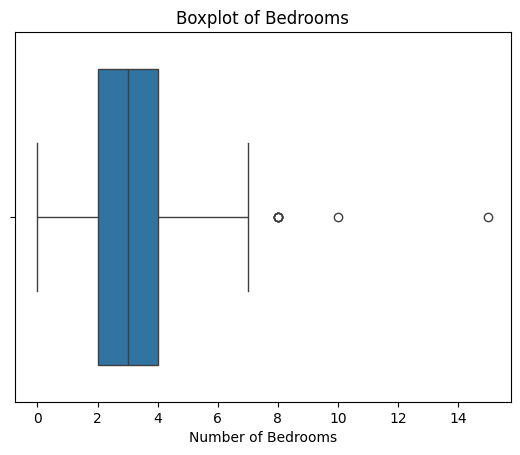

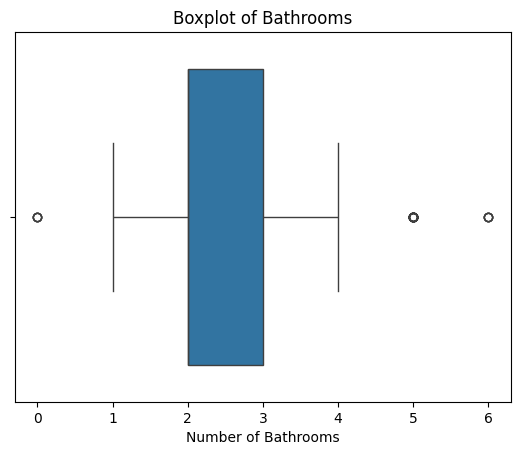

In [194]:
# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the "Bedrooms" column
sns.boxplot(x=df["Bedrooms"])

# Set the title and labels
plt.title("Boxplot of Bedrooms")
plt.xlabel("Number of Bedrooms")

# Show the plot
plt.show()

# Create a boxplot for the "Bathrooms" column
sns.boxplot(x=df["Bathrooms"])

# Set the title and labels
plt.title("Boxplot of Bathrooms")
plt.xlabel("Number of Bathrooms")

# Show the plot
plt.show()


#**Removing outliers in bathrroms and bedooms column using iqr**

In [195]:
# Calculate the IQR for the "Bedrooms" column
Q1_bedrooms = df["Bedrooms"].quantile(0.25)
Q3_bedrooms = df["Bedrooms"].quantile(0.75)
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms

# Define the lower and upper bounds for outliers
lower_bound_bedrooms = Q1_bedrooms - 1.5 * IQR_bedrooms
upper_bound_bedrooms = Q3_bedrooms + 1.5 * IQR_bedrooms

# Replace the outlier values with the upper bound
df.loc[df["Bedrooms"] > upper_bound_bedrooms, "Bedrooms"] = upper_bound_bedrooms

# Calculate the IQR for the "Bathrooms" column
# Calculate the IQR for the "Bathrooms" column
Q1_bathrooms = df["Bathrooms"].quantile(0.25)
Q3_bathrooms = df["Bathrooms"].quantile(0.75)
IQR_bathrooms = Q3_bathrooms - Q1_bathrooms

# Define the lower and upper bounds for outliers
lower_bound_bathrooms = Q1_bathrooms - 1.5 * IQR_bathrooms
upper_bound_bathrooms = Q3_bathrooms + 1.5 * IQR_bathrooms

# Replace the outlier values with the upper bound
df.loc[df["Bathrooms"] > upper_bound_bathrooms, "Bathrooms"] = upper_bound_bathrooms


# Define the lower and upper bounds for outliers
lower_bound_bathrooms = Q1_bathrooms - 1.5 * IQR_bathrooms
upper_bound_bathrooms = Q3_bathrooms + 1.5 * IQR_bathrooms

# Replace the outlier values with the upper bound
df.loc[df["Bathrooms"] > upper_bound_bathrooms, "Bathrooms"] = upper_bound_bathrooms


#**Visualizing removed outliers**

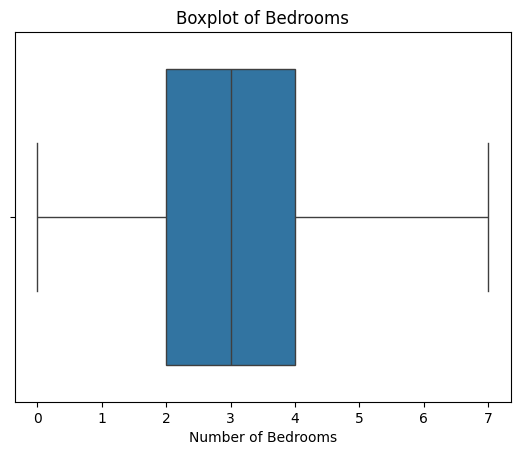

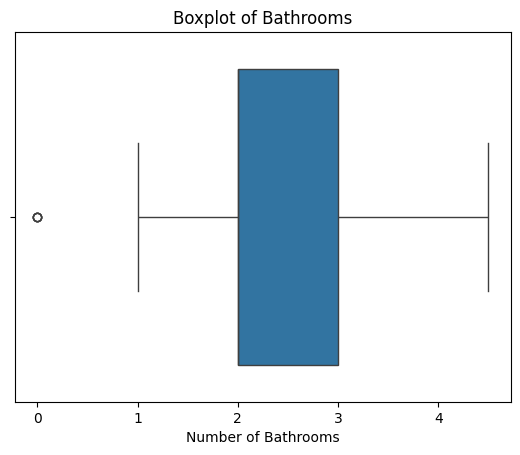

In [196]:
sns.boxplot(x=df["Bedrooms"])

# Set the title and labels
plt.title("Boxplot of Bedrooms")
plt.xlabel("Number of Bedrooms")

# Show the plot
plt.show()

# Create a boxplot for the "Bathrooms" column
sns.boxplot(x=df["Bathrooms"])

# Set the title and labels
plt.title("Boxplot of Bathrooms")
plt.xlabel("Number of Bathrooms")

# Show the plot
plt.show()

In [197]:
# Calculate the IQR for the "Bedrooms" column
Q1_bedrooms = df["Bedrooms"].quantile(0.25)
Q3_bedrooms = df["Bedrooms"].quantile(0.75)
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms

# Define the lower and upper bounds for outliers
lower_bound_bedrooms = Q1_bedrooms - 1.5 * IQR_bedrooms
upper_bound_bedrooms = Q3_bedrooms + 1.5 * IQR_bedrooms

# Calculate the IQR for the "Bathrooms" column
Q1_bathrooms = df["Bathrooms"].quantile(0.25)
Q3_bathrooms = df["Bathrooms"].quantile(0.75)
IQR_bathrooms = Q3_bathrooms - Q1_bathrooms

# Define the lower and upper bounds for outliers
lower_bound_bathrooms = Q1_bathrooms - 1.5 * IQR_bathrooms
upper_bound_bathrooms = Q3_bathrooms + 1.5 * IQR_bathrooms

# Check for outliers in the "Bedrooms" column
outliers_bedrooms = df[(df["Bedrooms"] < lower_bound_bedrooms) | (df["Bedrooms"] > upper_bound_bedrooms)]

# Check for outliers in the "Bathrooms" column
outliers_bathrooms = df[(df["Bathrooms"] < lower_bound_bathrooms) | (df["Bathrooms"] > upper_bound_bathrooms)]

# Print the number of outliers in each column
print("Number of outliers in Bedrooms:", len(outliers_bedrooms))
print("Number of outliers in Bathrooms:", len(outliers_bathrooms))


Number of outliers in Bedrooms: 0
Number of outliers in Bathrooms: 4


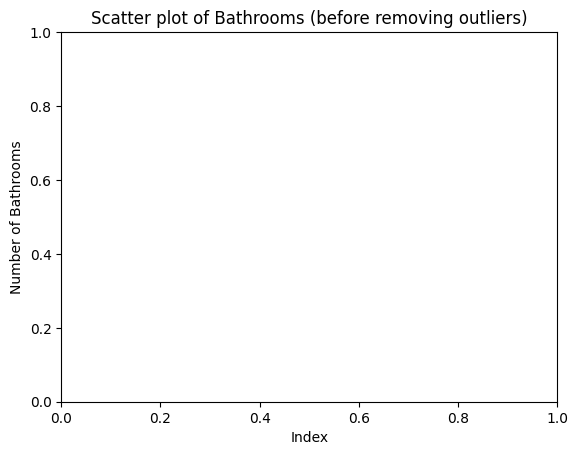

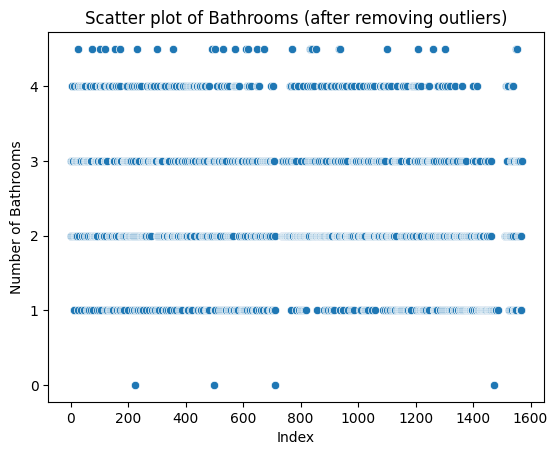

In [198]:
# Set the title and labels
plt.title("Scatter plot of Bathrooms (before removing outliers)")
plt.xlabel("Index")
plt.ylabel("Number of Bathrooms")

# Show the plot
plt.show()

# Remove the outliers in the "Bathrooms" column and replace them with the median value
median_bathrooms = df["Bathrooms"].median()
df.loc[df["Bathrooms"] > upper_bound_bathrooms, "Bathrooms"] = median_bathrooms

# Create a scatter plot of the "Bathrooms" column after removing outliers
sns.scatterplot(x=df.index, y=df["Bathrooms"])

# Set the title and labels
plt.title("Scatter plot of Bathrooms (after removing outliers)")
plt.xlabel("Index")
plt.ylabel("Number of Bathrooms")

# Show the plot
plt.show()

#**There are four "0" value outliers in bathrooms convert that to 1**

In [199]:
# Replace zero values in the "Bathrooms" column with 1
df["Bathrooms"] = df["Bathrooms"].replace(0, 1)

In [201]:
# Calculate the IQR for the "Bedrooms" column
Q1_bedrooms = df["Bedrooms"].quantile(0.25)
Q3_bedrooms = df["Bedrooms"].quantile(0.75)
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms

# Define the lower and upper bounds for outliers
lower_bound_bedrooms = Q1_bedrooms - 1.5 * IQR_bedrooms
upper_bound_bedrooms = Q3_bedrooms + 1.5 * IQR_bedrooms

# Calculate the IQR for the "Bathrooms" column
Q1_bathrooms = df["Bathrooms"].quantile(0.25)
Q3_bathrooms = df["Bathrooms"].quantile(0.75)
IQR_bathrooms = Q3_bathrooms - Q1_bathrooms

# Define the lower and upper bounds for outliers
lower_bound_bathrooms = Q1_bathrooms - 1.5 * IQR_bathrooms
upper_bound_bathrooms = Q3_bathrooms + 1.5 * IQR_bathrooms

# Check for outliers in the "Bedrooms" column
outliers_bedrooms = df[(df["Bedrooms"] < lower_bound_bedrooms) | (df["Bedrooms"] > upper_bound_bedrooms)]

# Check for outliers in the "Bathrooms" column
outliers_bathrooms = df[(df["Bathrooms"] < lower_bound_bathrooms) | (df["Bathrooms"] > upper_bound_bathrooms)]

# Print the number of outliers in each column
print("Number of outliers in Bedrooms:", len(outliers_bedrooms))
print("Number of outliers in Bathrooms:", len(outliers_bathrooms))


Number of outliers in Bedrooms: 0
Number of outliers in Bathrooms: 0


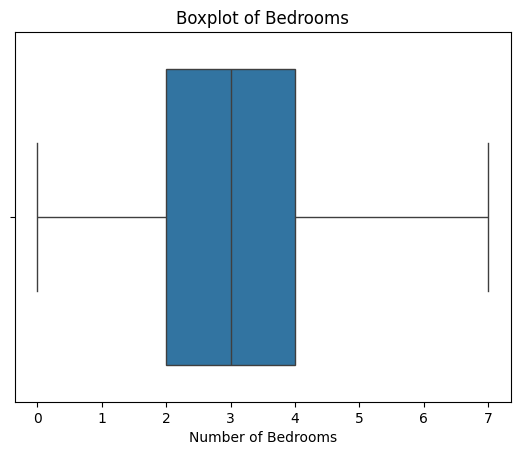

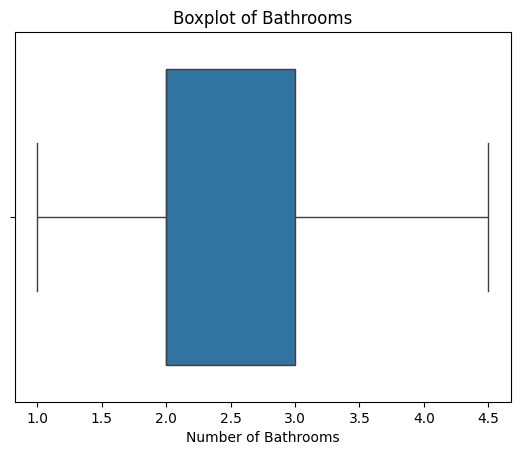

In [202]:
sns.boxplot(x=df["Bedrooms"])

# Set the title and labels
plt.title("Boxplot of Bedrooms")
plt.xlabel("Number of Bedrooms")

# Show the plot
plt.show()

# Create a boxplot for the "Bathrooms" column
sns.boxplot(x=df["Bathrooms"])

# Set the title and labels
plt.title("Boxplot of Bathrooms")
plt.xlabel("Number of Bathrooms")

# Show the plot
plt.show()

#**Cleaning kitchen column**

In [203]:
df["Kitchens"].unique()

array(['Description: Number of Kitchens: 1',
       'Description: Number of Kitchens: 2',
       'Description: Number of Kitchens: 4',
       'Description: Number of Kitchens: 3',
       'Description: Number of Kitchens: 6',
       'Included: Refrigerator, Stove, Washer, Dryer',
       'Included: Refrigerator, Stove',
       'Description: Number of Kitchens: 5',
       'Forced Air, Natural Gas, Furnace Owned', nan,
       'Other, Furnace Owned', 'Natural Gas', 'View virtual tour',
       'Included: Refrigerator, Stove, Washer, Dryer, Dishwasher Built In',
       'Natural Gas, Furnace Owned', 'Air Conditioning',
       'Included: Other', 'Has Heating (Unspecified Type)'], dtype=object)

In [204]:
# Extract the numeric values from the "Kitchens" column
df["Kitchens"] = df["Kitchens"].apply(lambda x: re.search(r'\d+', str(x)).group() if pd.notnull(x) and re.search(r'\d+', str(x)) else x)

# Convert the extracted values to a numeric data type
df["Kitchens"] = pd.to_numeric(df["Kitchens"], errors='coerce')



In [205]:
# Get the number of unique values in the "Kitchens" column
num_unique_kitchens = df["Kitchens"].nunique()

# Print the number of unique values in the "Kitchens" column
print("Number of unique values in the Kitchens column:", num_unique_kitchens)


Number of unique values in the Kitchens column: 6


In [206]:
# Get the number of NaN values in the "Kitchens" column
num_nan_kitchens = df["Kitchens"].isnull().sum()

# Print the number of NaN values in the "Kitchens" column
print("Number of NaN values in the Kitchens column:", num_nan_kitchens)


Number of NaN values in the Kitchens column: 83


In [207]:
# Replace NaN values in the "Kitchens" column with 1
df["Kitchens"] = df["Kitchens"].fillna(1)


In [111]:
print(df["Kitchens"].isnull().sum())

0


#**Checking outliers in kitchen**


In [208]:
# Calculate the IQR for the "Kitchens" column
Q1 = df["Kitchens"].quantile(0.25)
Q3 = df["Kitchens"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers in the "Kitchens" column
outliers = df[(df["Kitchens"] < lower_bound) | (df["Kitchens"] > upper_bound)]

# Print the number of outliers in the "Kitchens" column
print("Number of outliers in the Kitchens column:", len(outliers))


Number of outliers in the Kitchens column: 216


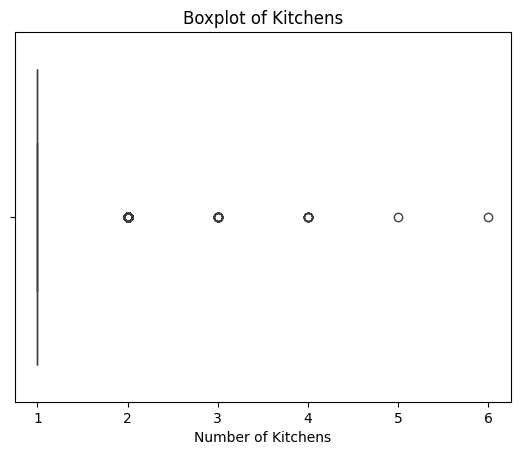

In [209]:

# Create a boxplot for the "Kitchens" column
sns.boxplot(x=df["Kitchens"])

# Set the title and labels
plt.title("Boxplot of Kitchens")
plt.xlabel("Number of Kitchens")

# Show the plot
plt.show()


In [210]:
# Replace the values 4, 5, and 6 in the "Kitchens" column with 3
df["Kitchens"] = df["Kitchens"].replace([4, 5, 6], 3)

#df["Kitchens"].value_counts()

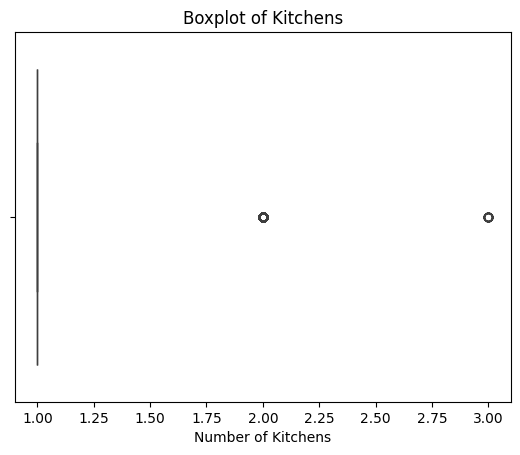

In [211]:
sns.boxplot(x=df["Kitchens"])

# Set the title and labels
plt.title("Boxplot of Kitchens")
plt.xlabel("Number of Kitchens")

# Show the plot
plt.show()


In [212]:
df["Kitchens"].value_counts()

,count
Kitchens,
1.0,1355
2.0,188
3.0,28


In [213]:
df["Kitchens"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1571 entries, 0 to 1570
Series name: Kitchens
Non-Null Count  Dtype  
--------------  -----  
1571 non-null   float64
dtypes: float64(1)
memory usage: 12.4 KB


In [214]:
# Convert the "Kitchens" column to a numeric data type
df["Kitchens"] = pd.to_numeric(df["Kitchens"], errors='coerce')


In [215]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 5
Integer variables: 0
Float variables: 6


In [216]:
df.head()

,Address,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Price per Sqft,Property Type,Square Feet,State
0,"234 Heise CRESCENT, Saskatoon, SK S7M 4Y8",3.0,3.0,1979,1.0,1.0,309000.0,C$240/sqft,Single Family Residence,1290.0,Saskatchewan
1,"326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1",2.0,4.0,1960,2.0,1.0,319900.0,C$338/sqft,Single Family Residence,947.0,Saskatchewan
2,"1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2",2.0,4.0,1946,1.0,2.0,450000.0,C$551/sqft,Single Family Residence,816.0,Saskatchewan
3,"107 Brookdale CRESCENT, Saskatoon, SK S7V 1K5",3.0,3.0,2006,2.0,1.0,569000.0,C$317/sqft,Retail,1795.0,Saskatchewan
4,"1208 6th AVENUE N, Saskatoon, SK S7K 2T5",4.0,4.0,2006,2.0,1.0,465000.0,C$344/sqft,Retail,1350.0,Saskatchewan


In [217]:
df.dtypes

,0
Address,object
Bathrooms,float64
Bedrooms,float64
Built Year,object
Garage Space,float64
Kitchens,float64
Price,float64
Price per Sqft,object
Property Type,object
Square Feet,float64


#**Cleaning price per square feet**

In [218]:

# Extract the numeric values from the "Price per Sqft" column
df["Price per Sqft"] = df["Price per Sqft"].apply(lambda x: re.search(r'\d+', x).group() if pd.notnull(x) and re.search(r'\d+', x) else x)

# Convert the extracted values to a numeric data type
df["Price per Sqft"] = pd.to_numeric(df["Price per Sqft"], errors='coerce')



In [219]:
df["Price per Sqft"].unique()

array([240., 338., 551., 317., 344., 372., 351., 270., 300., 273., 313.,
       255., 266., 188., 312., 174., 327., 320., 314., 246., 424., 488.,
       288., 380., 214., 763., 512., 212., 287., 328., 294., 318., 382.,
       437., 241., 452., 200., 272., 349., 324., 335., 418., 207., 319.,
       537., 332., 370., 420., 252., 398., 249., 542., 384., 225., 342.,
       196., 438., 764., 409., 394., 383., 161., 358., 329., 308., 307.,
       396., 359., 627., 345., 346., 193., 470., 257., 203., 390., 283.,
       386., 381., 385., 128., 405.,  91., 421., 285., 732., 516., 337.,
       423.,  50., 306., 323., 415., 395., 491., 198., 353., 321., 295.,
       373., 430., 242., 333., 215.,  35., 388., 297., 378., 391., 336.,
       187., 250., 254., 311., 256., 231., 400., 362., 330., 243., 248.,
       361., 479., 671., 376., 310.,  48., 572., 237., 439.,  95., 253.,
       355., 354., 247., 450., 220., 341., 173., 233., 259., 156., 504.,
       204., 280., 471., 315., 429., 397., 436., 65

In [220]:

# Check for null values in the "Price per Sqft" column
null_values = df["Price per Sqft"].isnull().sum()

# Check for empty values in the "Price per Sqft" column
empty_values = df["Price per Sqft"].empty

# Print the number of null and empty values in the "Price per Sqft" column
print("Number of null values in the Price per Sqft column:", null_values)
print("Number of empty values in the Price per Sqft column:", empty_values)

Number of null values in the Price per Sqft column: 75
Number of empty values in the Price per Sqft column: False


In [221]:
# Calculate the IQR for the "Price per Sqft" column
Q1 = df["Price per Sqft"].quantile(0.25)
Q3 = df["Price per Sqft"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers in the "Price per Sqft" column
outliers = df[(df["Price per Sqft"] < lower_bound) | (df["Price per Sqft"] > upper_bound)]

# Print the number of outliers in the "Price per Sqft" column
print("Number of outliers in the Price per Sqft column:", len(outliers))


Number of outliers in the Price per Sqft column: 43


#**Visualise outliers in price per square feet**

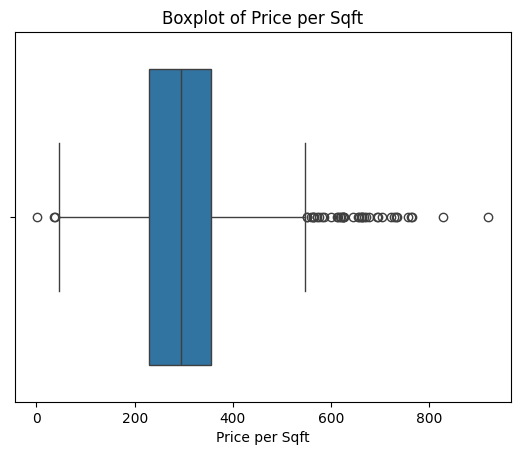

In [222]:
# Create a boxplot for the "Price per Sqft" column
sns.boxplot(x=df["Price per Sqft"])

# Set the title and labels
plt.title("Boxplot of Price per Sqft")
plt.xlabel("Price per Sqft")

# Show the plot
plt.show()


#**Calculate the IQR for the "Price per Sqft" column**

In [223]:
Q1 = df["Price per Sqft"].quantile(0.25)
Q3 = df["Price per Sqft"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace the outlier values with the lower and upper bounds
df.loc[df["Price per Sqft"] < lower_bound, "Price per Sqft"] = lower_bound
df.loc[df["Price per Sqft"] > upper_bound, "Price per Sqft"] = upper_bound


#**Create a boxplot for the "Price per Sqft" column**

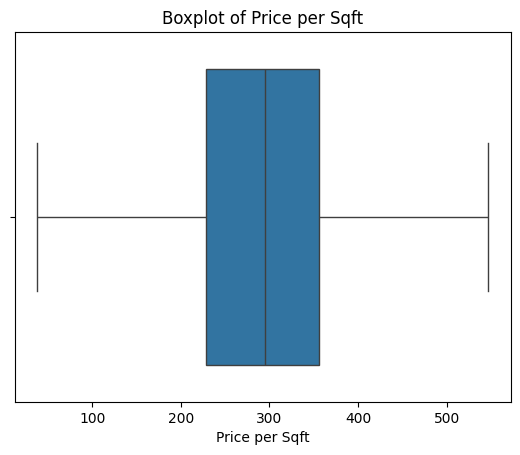

In [224]:
sns.boxplot(x=df["Price per Sqft"])

# Set the title and labels
plt.title("Boxplot of Price per Sqft")
plt.xlabel("Price per Sqft")

# Show the plot
plt.show()



#**Check for outliers in the "Price per Sqft" column**

In [225]:
# Calculate the IQR for the "Price per Sqft" column
Q1 = df["Price per Sqft"].quantile(0.25)
Q3 = df["Price per Sqft"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers in the "Price per Sqft" column
outliers = df[(df["Price per Sqft"] < lower_bound) | (df["Price per Sqft"] > upper_bound)]

# Print the number of outliers in the "Price per Sqft" column
print("Number of outliers in the Price per Sqft column:", len(outliers))

Number of outliers in the Price per Sqft column: 0


In [226]:
df.head()

,Address,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Price per Sqft,Property Type,Square Feet,State
0,"234 Heise CRESCENT, Saskatoon, SK S7M 4Y8",3.0,3.0,1979,1.0,1.0,309000.0,240.000,Single Family Residence,1290.0,Saskatchewan
1,"326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1",2.0,4.0,1960,2.0,1.0,319900.0,338.000,Single Family Residence,947.0,Saskatchewan
2,"1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2",2.0,4.0,1946,1.0,2.0,450000.0,547.125,Single Family Residence,816.0,Saskatchewan
3,"107 Brookdale CRESCENT, Saskatoon, SK S7V 1K5",3.0,3.0,2006,2.0,1.0,569000.0,317.000,Retail,1795.0,Saskatchewan
4,"1208 6th AVENUE N, Saskatoon, SK S7K 2T5",4.0,4.0,2006,2.0,1.0,465000.0,344.000,Retail,1350.0,Saskatchewan


In [227]:
df["Property Type"].unique()

array(['Single Family Residence', 'Retail', 'Condominium', 'Duplex',
       'Townhouse', 'Manufactured Home', 'Warehouse', 'Unimproved Land',
       'Multi Family', 'Quadruplex'], dtype=object)

In [228]:
property_type_counts = df["Property Type"].value_counts()
print(property_type_counts)


Property Type
Single Family Residence    629
Retail                     532
Condominium                214
Townhouse                   94
Unimproved Land             61
Manufactured Home           13
Warehouse                   12
Duplex                      11
Multi Family                 4
Quadruplex                   1
Name: count, dtype: int64


#**Visualising property type values**

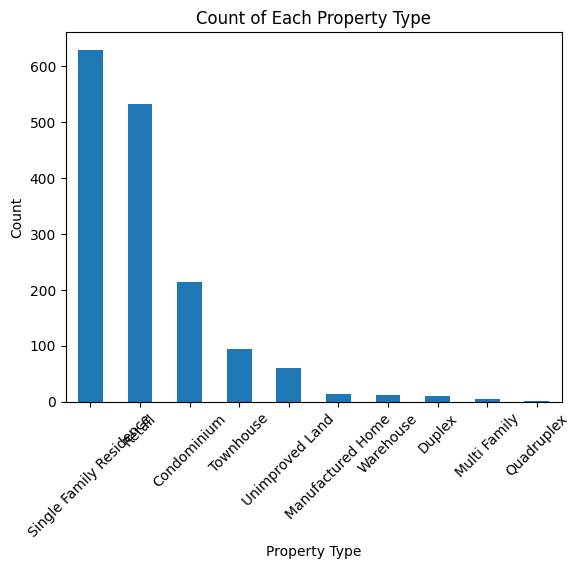

In [229]:
import matplotlib.pyplot as plt

property_type_counts.plot(kind='bar')
plt.title('Count of Each Property Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#**Check for empty values in the "Property Type" column**

In [230]:

empty_values = df["Property Type"].str.strip().empty

# Print the number of empty values in the "Property Type" column
print("Number of empty values in the Property Type column:", int(empty_values))


Number of empty values in the Property Type column: 0


In [231]:
# Check for null values in the "Property Type" column
null_values = df["Property Type"].isnull()

# Print the number of null values in the "Property Type" column
print("Number of null values in the Property Type column:", null_values.sum())


Number of null values in the Property Type column: 0


In [232]:
property_type_counts = df["Property Type"].value_counts()
print(property_type_counts)


Property Type
Single Family Residence    629
Retail                     532
Condominium                214
Townhouse                   94
Unimproved Land             61
Manufactured Home           13
Warehouse                   12
Duplex                      11
Multi Family                 4
Quadruplex                   1
Name: count, dtype: int64


In [233]:
df["Property Type"].value_counts().sum()

1571

#**Convert 'Property Type' to categorical and one-hot encode**

In [234]:
property_type_counts = df["Property Type"].value_counts()
print(property_type_counts)

Property Type
Single Family Residence    629
Retail                     532
Condominium                214
Townhouse                   94
Unimproved Land             61
Manufactured Home           13
Warehouse                   12
Duplex                      11
Multi Family                 4
Quadruplex                   1
Name: count, dtype: int64


In [235]:
df = pd.get_dummies(df, columns=["Property Type"], dtype=int)

In [236]:
df.head()

,Address,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Price per Sqft,Square Feet,State,Property Type_Condominium,Property Type_Duplex,Property Type_Manufactured Home,Property Type_Multi Family,Property Type_Quadruplex,Property Type_Retail,Property Type_Single Family Residence,Property Type_Townhouse,Property Type_Unimproved Land,Property Type_Warehouse
0,"234 Heise CRESCENT, Saskatoon, SK S7M 4Y8",3.0,3.0,1979,1.0,1.0,309000.0,240.000,1290.0,Saskatchewan,0,0,0,0,0,0,1,0,0,0
1,"326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1",2.0,4.0,1960,2.0,1.0,319900.0,338.000,947.0,Saskatchewan,0,0,0,0,0,0,1,0,0,0
2,"1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2",2.0,4.0,1946,1.0,2.0,450000.0,547.125,816.0,Saskatchewan,0,0,0,0,0,0,1,0,0,0
3,"107 Brookdale CRESCENT, Saskatoon, SK S7V 1K5",3.0,3.0,2006,2.0,1.0,569000.0,317.000,1795.0,Saskatchewan,0,0,0,0,0,1,0,0,0,0
4,"1208 6th AVENUE N, Saskatoon, SK S7K 2T5",4.0,4.0,2006,2.0,1.0,465000.0,344.000,1350.0,Saskatchewan,0,0,0,0,0,1,0,0,0,0


In [237]:
df["State"].value_counts()

,count
State,
Saskatchewan,1571


In [238]:
df.isnull().sum()

,0
Address,0
Bathrooms,75
Bedrooms,75
Built Year,63
Garage Space,0
Kitchens,0
Price,0
Price per Sqft,75
Square Feet,14
State,0


#**Dropping state column (as it is not needed for prediction)**

In [239]:
# Drop the "State" column from the DataFrame
df = df.drop("State", axis=1)


In [240]:
df.head()

,Address,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Price per Sqft,Square Feet,Property Type_Condominium,Property Type_Duplex,Property Type_Manufactured Home,Property Type_Multi Family,Property Type_Quadruplex,Property Type_Retail,Property Type_Single Family Residence,Property Type_Townhouse,Property Type_Unimproved Land,Property Type_Warehouse
0,"234 Heise CRESCENT, Saskatoon, SK S7M 4Y8",3.0,3.0,1979,1.0,1.0,309000.0,240.000,1290.0,0,0,0,0,0,0,1,0,0,0
1,"326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1",2.0,4.0,1960,2.0,1.0,319900.0,338.000,947.0,0,0,0,0,0,0,1,0,0,0
2,"1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2",2.0,4.0,1946,1.0,2.0,450000.0,547.125,816.0,0,0,0,0,0,0,1,0,0,0
3,"107 Brookdale CRESCENT, Saskatoon, SK S7V 1K5",3.0,3.0,2006,2.0,1.0,569000.0,317.000,1795.0,0,0,0,0,0,1,0,0,0,0
4,"1208 6th AVENUE N, Saskatoon, SK S7K 2T5",4.0,4.0,2006,2.0,1.0,465000.0,344.000,1350.0,0,0,0,0,0,1,0,0,0,0


#**Dropping Property Type_Quadruplex column as it have only one value and to defend multicollinearity**

In [241]:
# Dropping the column
df.drop(columns=['Property Type_Quadruplex'], inplace=True)

In [242]:
df.head()

,Address,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Price per Sqft,Square Feet,Property Type_Condominium,Property Type_Duplex,Property Type_Manufactured Home,Property Type_Multi Family,Property Type_Retail,Property Type_Single Family Residence,Property Type_Townhouse,Property Type_Unimproved Land,Property Type_Warehouse
0,"234 Heise CRESCENT, Saskatoon, SK S7M 4Y8",3.0,3.0,1979,1.0,1.0,309000.0,240.000,1290.0,0,0,0,0,0,1,0,0,0
1,"326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1",2.0,4.0,1960,2.0,1.0,319900.0,338.000,947.0,0,0,0,0,0,1,0,0,0
2,"1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2",2.0,4.0,1946,1.0,2.0,450000.0,547.125,816.0,0,0,0,0,0,1,0,0,0
3,"107 Brookdale CRESCENT, Saskatoon, SK S7V 1K5",3.0,3.0,2006,2.0,1.0,569000.0,317.000,1795.0,0,0,0,0,1,0,0,0,0
4,"1208 6th AVENUE N, Saskatoon, SK S7K 2T5",4.0,4.0,2006,2.0,1.0,465000.0,344.000,1350.0,0,0,0,0,1,0,0,0,0


In [243]:
len(df["Address"].value_counts())


1463

In [244]:
df.Bedrooms.describe()

,Bedrooms
count,1496.000000
mean,3.287433
std,1.278692
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,7.000000


In [245]:
df.Kitchens.describe()

,Kitchens
count,1571.000000
mean,1.155315
std,0.408589
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


In [246]:
df.Bathrooms.describe()

,Bathrooms
count,1496.000000
mean,2.377674
std,1.033911
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.500000


In [247]:
df.Price.describe()

,Price
count,1.571000e+03
mean,4.233352e+05
std,3.150294e+05
min,9.900000e+03
25%,2.299000e+05
50%,3.435000e+05
75%,5.299000e+05
max,2.777777e+06


In [248]:
df["Built Year"].describe()

,Built Year
count,1508
unique,115
top,2024
freq,86


#**Cleaning addresss column**

In [249]:
df["Address"].tail()

,Address
1566,"431 St John STREET, Regina, SK S4R 1R4"
1567,"815 Rae STREET, Regina, SK S4T 2B3"
1568,"431 Arthur STREET, Regina, SK S4R 4X5"
1569,"3123 Green Stone ROAD, Regina, SK S4V 3X4"
1570,"2023 Ottawa STREET, Regina, SK S4P 1P9"


In [250]:
df["Address"].unique()

array(['234 Heise CRESCENT, Saskatoon, SK S7M 4Y8',
       '326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1',
       '1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2', ...,
       '815 Rae STREET, Regina, SK S4T 2B3',
       '3123 Green Stone ROAD, Regina, SK S4V 3X4',
       '2023 Ottawa STREET, Regina, SK S4P 1P9'], dtype=object)

In [251]:
df['City'] = df['Address'].str.extract(r',\s*([A-Za-z\s]+),\s+[A-Z]{2}\s+[A-Za-z0-9\s]+')[0]

In [252]:
# Display the DataFrame with the extracted city
print(df[['Address', 'City']])

                                            Address       City
0         234 Heise CRESCENT, Saskatoon, SK S7M 4Y8  Saskatoon
1        326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1  Saskatoon
2      1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2  Saskatoon
3     107 Brookdale CRESCENT, Saskatoon, SK S7V 1K5  Saskatoon
4          1208 6th AVENUE N, Saskatoon, SK S7K 2T5  Saskatoon
...                                             ...        ...
1566         431 St John STREET, Regina, SK S4R 1R4     Regina
1567             815 Rae STREET, Regina, SK S4T 2B3     Regina
1568          431 Arthur STREET, Regina, SK S4R 4X5     Regina
1569      3123 Green Stone ROAD, Regina, SK S4V 3X4     Regina
1570         2023 Ottawa STREET, Regina, SK S4P 1P9     Regina

[1571 rows x 2 columns]


In [253]:
df.head()

,Address,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Price per Sqft,Square Feet,Property Type_Condominium,Property Type_Duplex,Property Type_Manufactured Home,Property Type_Multi Family,Property Type_Retail,Property Type_Single Family Residence,Property Type_Townhouse,Property Type_Unimproved Land,Property Type_Warehouse,City
0,"234 Heise CRESCENT, Saskatoon, SK S7M 4Y8",3.0,3.0,1979,1.0,1.0,309000.0,240.000,1290.0,0,0,0,0,0,1,0,0,0,Saskatoon
1,"326 Ottawa AVENUE N, Saskatoon, SK S7L 3P1",2.0,4.0,1960,2.0,1.0,319900.0,338.000,947.0,0,0,0,0,0,1,0,0,0,Saskatoon
2,"1019 Lansdowne AVENUE, Saskatoon, SK S7H 2C2",2.0,4.0,1946,1.0,2.0,450000.0,547.125,816.0,0,0,0,0,0,1,0,0,0,Saskatoon
3,"107 Brookdale CRESCENT, Saskatoon, SK S7V 1K5",3.0,3.0,2006,2.0,1.0,569000.0,317.000,1795.0,0,0,0,0,1,0,0,0,0,Saskatoon
4,"1208 6th AVENUE N, Saskatoon, SK S7K 2T5",4.0,4.0,2006,2.0,1.0,465000.0,344.000,1350.0,0,0,0,0,1,0,0,0,0,Saskatoon


#**Dropping adress column**

In [254]:
df = df.drop(columns=['Address']) # Drop the 'Address' column from the dataset-city extracted from address

In [255]:
df.head()

,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Price per Sqft,Square Feet,Property Type_Condominium,Property Type_Duplex,Property Type_Manufactured Home,Property Type_Multi Family,Property Type_Retail,Property Type_Single Family Residence,Property Type_Townhouse,Property Type_Unimproved Land,Property Type_Warehouse,City
0,3.0,3.0,1979,1.0,1.0,309000.0,240.000,1290.0,0,0,0,0,0,1,0,0,0,Saskatoon
1,2.0,4.0,1960,2.0,1.0,319900.0,338.000,947.0,0,0,0,0,0,1,0,0,0,Saskatoon
2,2.0,4.0,1946,1.0,2.0,450000.0,547.125,816.0,0,0,0,0,0,1,0,0,0,Saskatoon
3,3.0,3.0,2006,2.0,1.0,569000.0,317.000,1795.0,0,0,0,0,1,0,0,0,0,Saskatoon
4,4.0,4.0,2006,2.0,1.0,465000.0,344.000,1350.0,0,0,0,0,1,0,0,0,0,Saskatoon


#**Visualizing not null and null values in city column**

<ipython-input-256-8337f1b030d9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Count', data=visual_df, palette='viridis')


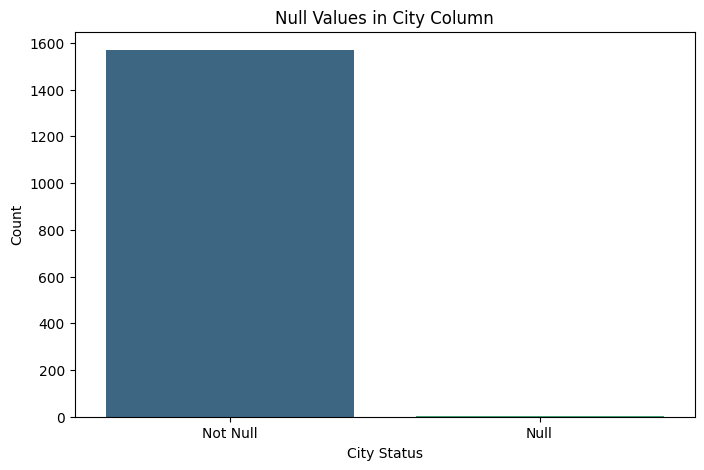

In [256]:
null_counts = df['City'].isnull().value_counts()

# Prepare the data for visualization
visual_data = {
    'City': ['Not Null', 'Null'],
    'Count': [len(df) - null_counts[True], null_counts[True]]
}

visual_df = pd.DataFrame(visual_data)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='City', y='Count', data=visual_df, palette='viridis')
plt.title('Null Values in City Column')
plt.xlabel('City Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [257]:
df.isnull().sum()

,0
Bathrooms,75
Bedrooms,75
Built Year,63
Garage Space,0
Kitchens,0
Price,0
Price per Sqft,75
Square Feet,14
Property Type_Condominium,0
Property Type_Duplex,0


In [258]:
df.dtypes

,0
Bathrooms,float64
Bedrooms,float64
Built Year,object
Garage Space,float64
Kitchens,float64
Price,float64
Price per Sqft,float64
Square Feet,float64
Property Type_Condominium,int64
Property Type_Duplex,int64


In [259]:
# Convert Built Year to integer
df['Built Year'] = pd.to_numeric(df['Built Year'], errors='coerce')

In [260]:
df.dtypes

,0
Bathrooms,float64
Bedrooms,float64
Built Year,float64
Garage Space,float64
Kitchens,float64
Price,float64
Price per Sqft,float64
Square Feet,float64
Property Type_Condominium,int64
Property Type_Duplex,int64


In [261]:
df["City"].value_counts()

,count
City,
Regina,814
Saskatoon,740
White City,7
Emerald Park,5
Pilot Butte,2
Grand Coulee,1


In [262]:
# Dropping rows where City is neither Saskatoon nor Regina
df = df[df['City'].isin(['Saskatoon', 'Regina'])]

In [263]:
df["City"].value_counts()

,count
City,
Regina,814
Saskatoon,740


In [265]:
df.shape #Display the rows

(1554, 18)

#**Shuffle the rows in the dataset to randomize the order( for better train test split)**

In [268]:
df.sample(frac=1, random_state=42).reset_index(drop=True)

,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Price per Sqft,Square Feet,Property Type_Condominium,Property Type_Duplex,Property Type_Manufactured Home,Property Type_Multi Family,Property Type_Retail,Property Type_Single Family Residence,Property Type_Townhouse,Property Type_Unimproved Land,Property Type_Warehouse,City
0,1.0,3.0,1977.0,1.0,1.0,159900.0,167.0,960.0,0,0,0,0,0,0,1,0,0,Regina
1,2.0,3.0,1986.0,2.0,1.0,142500.0,102.0,1399.0,1,0,0,0,0,0,0,0,0,Regina
2,1.0,3.0,1972.0,1.0,1.0,329900.0,388.0,850.0,0,0,0,0,0,1,0,0,0,Saskatoon
3,2.0,5.0,1962.0,2.0,2.0,375000.0,357.0,1050.0,0,0,0,0,0,1,0,0,0,Regina
4,4.5,5.0,2017.0,3.0,2.0,709900.0,354.0,2005.0,0,0,0,0,1,0,0,0,0,Saskatoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,2.0,2.0,1913.0,1.0,1.0,349900.0,232.0,1511.0,0,0,0,0,1,0,0,0,0,Regina
1550,3.0,4.0,1933.0,2.0,1.0,674900.0,348.0,1940.0,0,0,0,0,1,0,0,0,0,Saskatoon
1551,2.0,4.0,1954.0,1.0,1.0,80000.0,104.0,768.0,0,0,0,0,0,1,0,0,0,Regina
1552,1.0,3.0,1913.0,1.0,1.0,59900.0,83.0,720.0,0,0,0,0,0,1,0,0,0,Regina


#**Shuffling five more times**

In [267]:
# Shuffle the DataFrame multiple times
for _ in range(5):  # Shuffle 5 times
    df = df.sample(frac=1, random_state=None).reset_index(drop=True)

In [269]:
df.head()

,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Price per Sqft,Square Feet,Property Type_Condominium,Property Type_Duplex,Property Type_Manufactured Home,Property Type_Multi Family,Property Type_Retail,Property Type_Single Family Residence,Property Type_Townhouse,Property Type_Unimproved Land,Property Type_Warehouse,City
0,2.0,3.0,2015.0,2.0,1.0,364900.0,304.0,1200.0,0,0,0,0,1,0,0,0,0,Saskatoon
1,2.0,2.0,2015.0,1.0,1.0,209900.0,238.0,883.0,1,0,0,0,0,0,0,0,0,Regina
2,2.0,3.0,1977.0,2.0,1.0,339900.0,328.0,1036.0,0,0,0,0,0,1,0,0,0,Regina
3,4.5,4.0,1966.0,2.0,1.0,849900.0,256.0,3325.0,0,0,0,0,1,0,0,0,0,Regina
4,2.0,3.0,1962.0,1.0,1.0,324900.0,328.0,992.0,0,0,0,0,0,1,0,0,0,Regina


#**Onehot encoding city problems**

In [270]:
df = pd.get_dummies(df, columns=["City"], dtype=int)

In [271]:
df.head()

,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Price per Sqft,Square Feet,Property Type_Condominium,Property Type_Duplex,Property Type_Manufactured Home,Property Type_Multi Family,Property Type_Retail,Property Type_Single Family Residence,Property Type_Townhouse,Property Type_Unimproved Land,Property Type_Warehouse,City_Regina,City_Saskatoon
0,2.0,3.0,2015.0,2.0,1.0,364900.0,304.0,1200.0,0,0,0,0,1,0,0,0,0,0,1
1,2.0,2.0,2015.0,1.0,1.0,209900.0,238.0,883.0,1,0,0,0,0,0,0,0,0,1,0
2,2.0,3.0,1977.0,2.0,1.0,339900.0,328.0,1036.0,0,0,0,0,0,1,0,0,0,1,0
3,4.5,4.0,1966.0,2.0,1.0,849900.0,256.0,3325.0,0,0,0,0,1,0,0,0,0,1,0
4,2.0,3.0,1962.0,1.0,1.0,324900.0,328.0,992.0,0,0,0,0,0,1,0,0,0,1,0


In [272]:
df.dtypes

,0
Bathrooms,float64
Bedrooms,float64
Built Year,float64
Garage Space,float64
Kitchens,float64
Price,float64
Price per Sqft,float64
Square Feet,float64
Property Type_Condominium,int64
Property Type_Duplex,int64


#**Visualizing correlation matrix to find correlation between data**

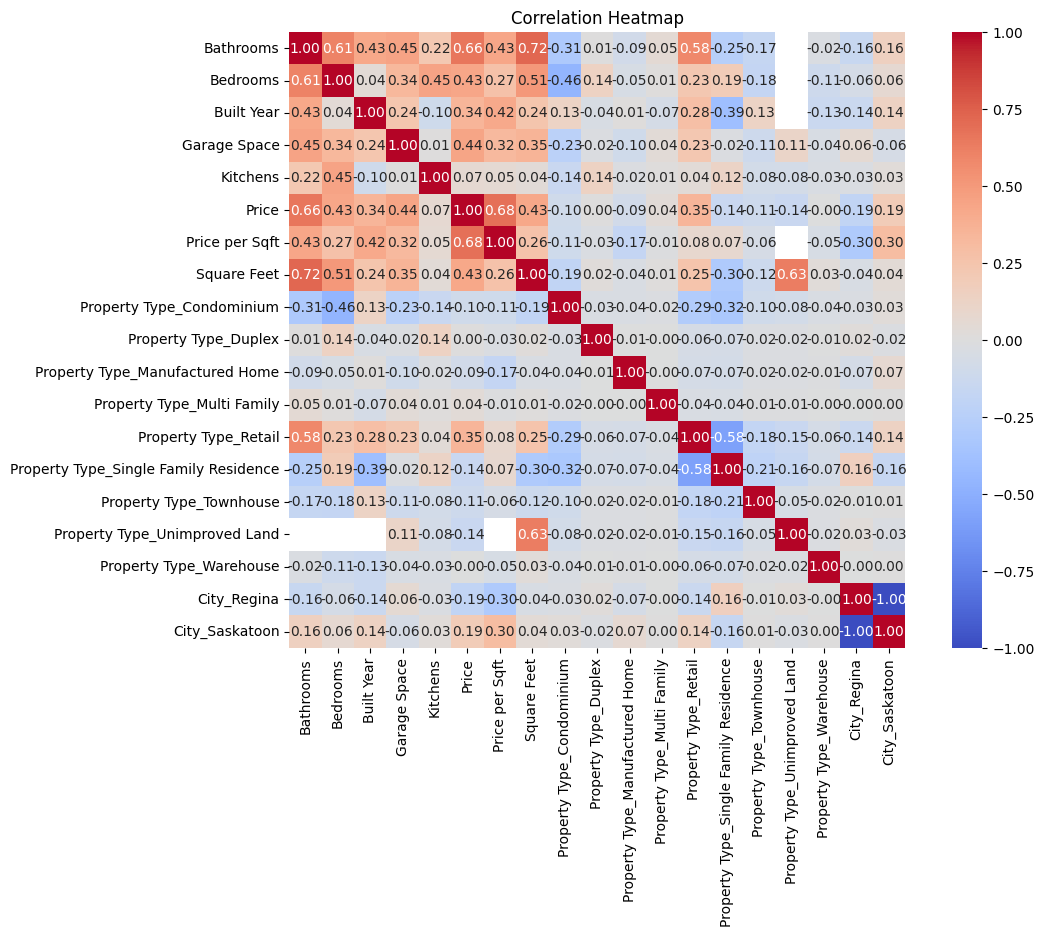

In [273]:
# Calculate the correlation matrix
corr = df.corr()

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

#**Visualizing correlation between price and garage space**

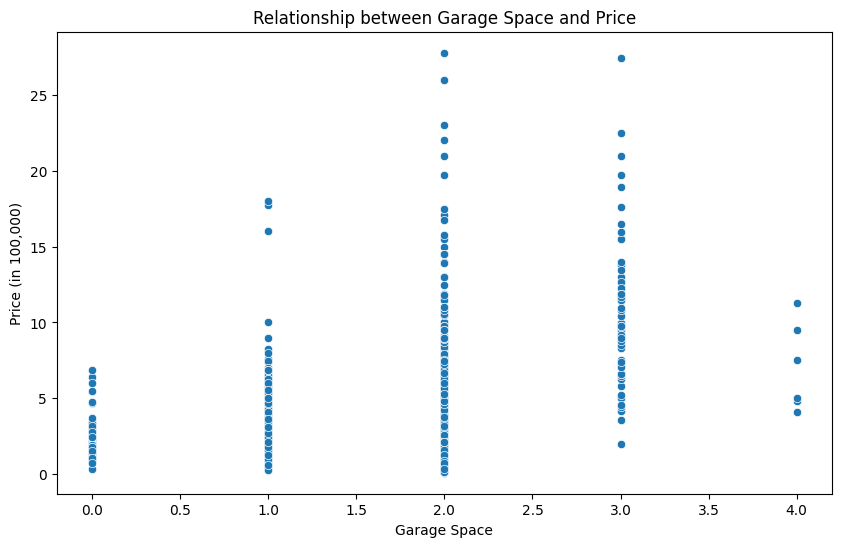

In [275]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
# Divide Price by 100000 for scaling
sns.scatterplot(x=df['Garage Space'], y=df['Price'] / 100000)

# Adding labels and title
plt.xlabel("Garage Space")
plt.ylabel("Price (in 100,000)")
plt.title("Relationship between Garage Space and Price")

# Show the plot
plt.show()

#**Converting 4 values in a garage space to 3 to overcome noise**

In [276]:
# Replace values of 4 with 3 in the 'Garage Space' column
df['Garage Space'] = df['Garage Space'].replace(4, 3)

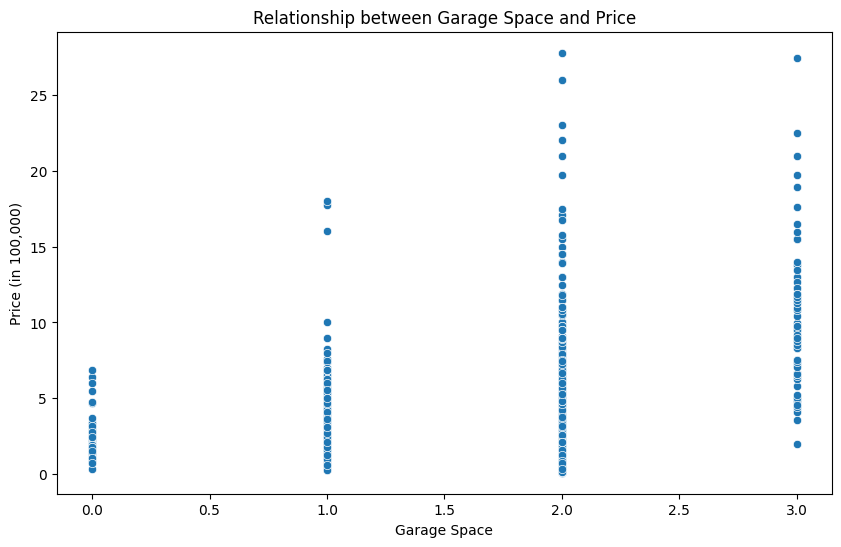

In [277]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
# Divide Price by 100000 for scaling
sns.scatterplot(x=df['Garage Space'], y=df['Price'] / 100000)

# Adding labels and title
plt.xlabel("Garage Space")
plt.ylabel("Price (in 100,000)")
plt.title("Relationship between Garage Space and Price")

# Show the plot
plt.show()

In [278]:
# Applying the conditions
df.loc[(df['Garage Space'] == 1) & (df['Price'] > 1500000), 'Garage Space'] = 2
df.loc[(df['Garage Space'] == 2) & (df['Price'] > 1700000), 'Garage Space'] = 3

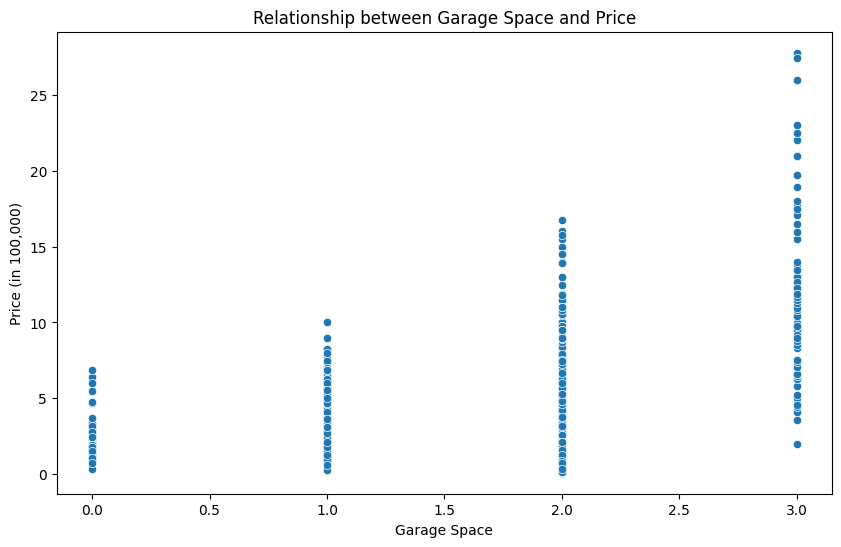

In [279]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
# Divide Price by 100000 for scaling
sns.scatterplot(x=df['Garage Space'], y=df['Price'] / 100000)

# Adding labels and title
plt.xlabel("Garage Space")
plt.ylabel("Price (in 100,000)")
plt.title("Relationship between Garage Space and Price")

# Show the plot
plt.show()

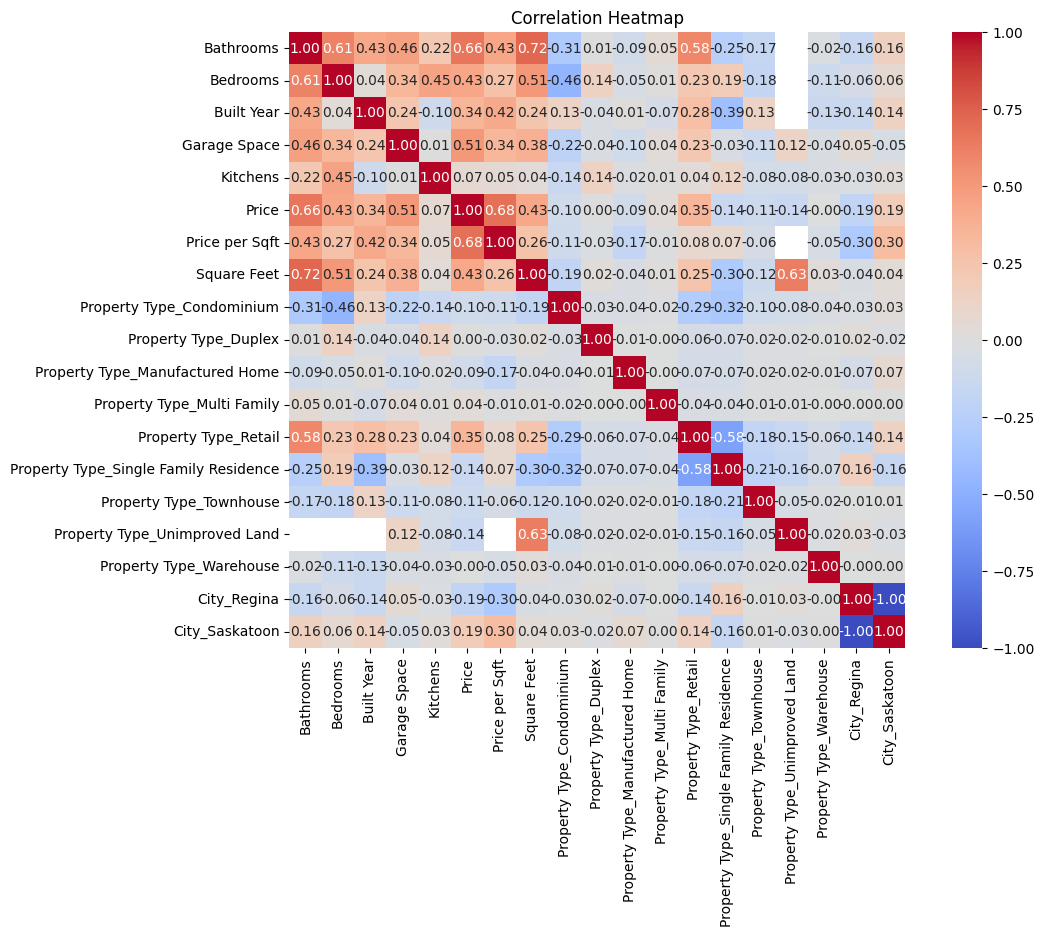

In [280]:
# Calculate the correlation matrix
corr = df.corr()

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

#**Checking correlation of bathrooms and bedrooms with respect to price**

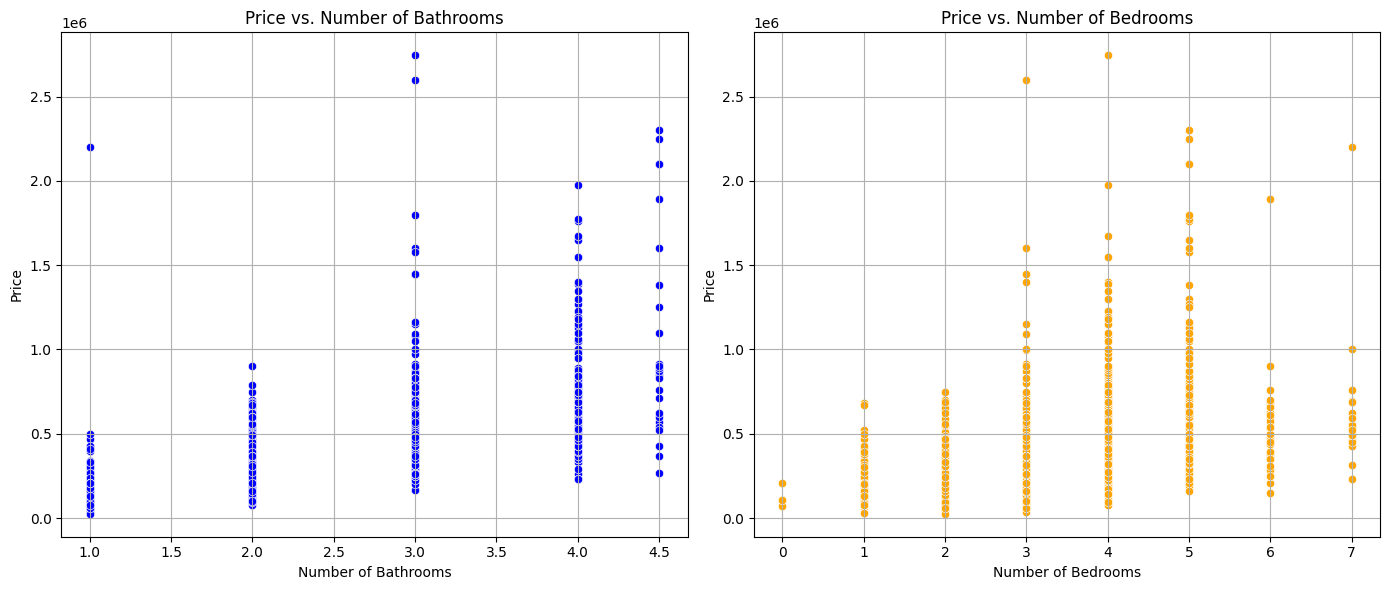

In [281]:
# Set the size of the plot
plt.figure(figsize=(14, 6))

# Scatter plot for Bathrooms vs Price
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(x='Bathrooms', y='Price', data=df, color='blue')
plt.title('Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.grid(True)

# Scatter plot for Bedrooms vs Price
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(x='Bedrooms', y='Price', data=df, color='orange')
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [282]:
df = df[~((df['Bathrooms'] == 1) & (df['Price'] > 1500000))]

In [283]:
# Convert 3 in Bathrooms to 4 where Price is greater than 2,000,000
df.loc[(df['Bathrooms'] == 3) & (df['Price'] > 2000000), 'Bathrooms'] = 4

In [284]:
# Convert 4.5 in Bathrooms to 4
df['Bathrooms'] = df['Bathrooms'].replace(4.5, 4)

In [285]:
df.Bathrooms.unique()

array([ 2.,  4., nan,  1.,  3.])

In [286]:
# Convert 3 and 4 in Bedrooms to 5 where Price is greater than 22,000,000
df.loc[(df['Bedrooms'].isin([3, 4])) & (df['Price'] > 2000000), 'Bedrooms'] = 5

In [287]:
# Convert 6 and 7 in Bedrooms to 5 where Price is less than 1,500,000
df.loc[(df['Bedrooms'].isin([6, 7])) & (df['Price'] < 1500000), 'Bedrooms'] = 5

In [289]:
# Assuming you have a DataFrame `df` with columns 'bedrooms' and 'price'
df.loc[(df['Price'] > 2500000) & (df['Bedrooms'] == 5), 'Bedrooms'] = 6


#**Plotting bathrooms and bedrooms with price**

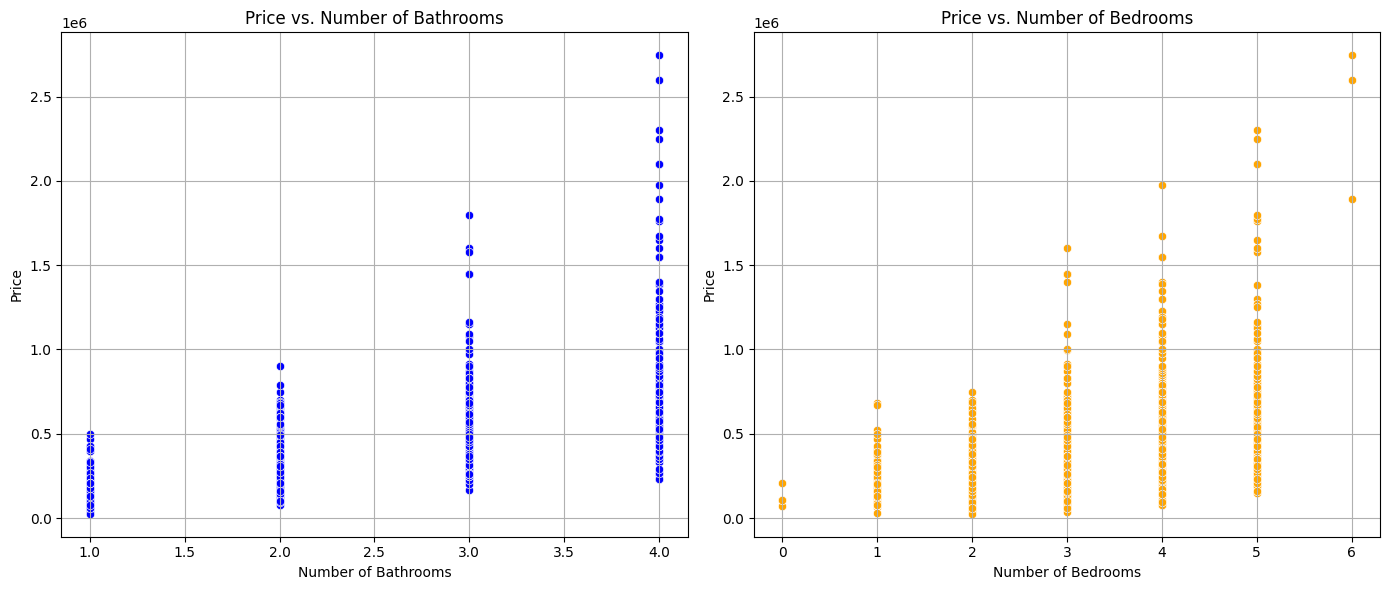

In [290]:
# Set the size of the plot
plt.figure(figsize=(14, 6))

# Scatter plot for Bathrooms vs Price
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(x='Bathrooms', y='Price', data=df, color='blue')
plt.title('Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.grid(True)

# Scatter plot for Bedrooms vs Price
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(x='Bedrooms', y='Price', data=df, color='orange')
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

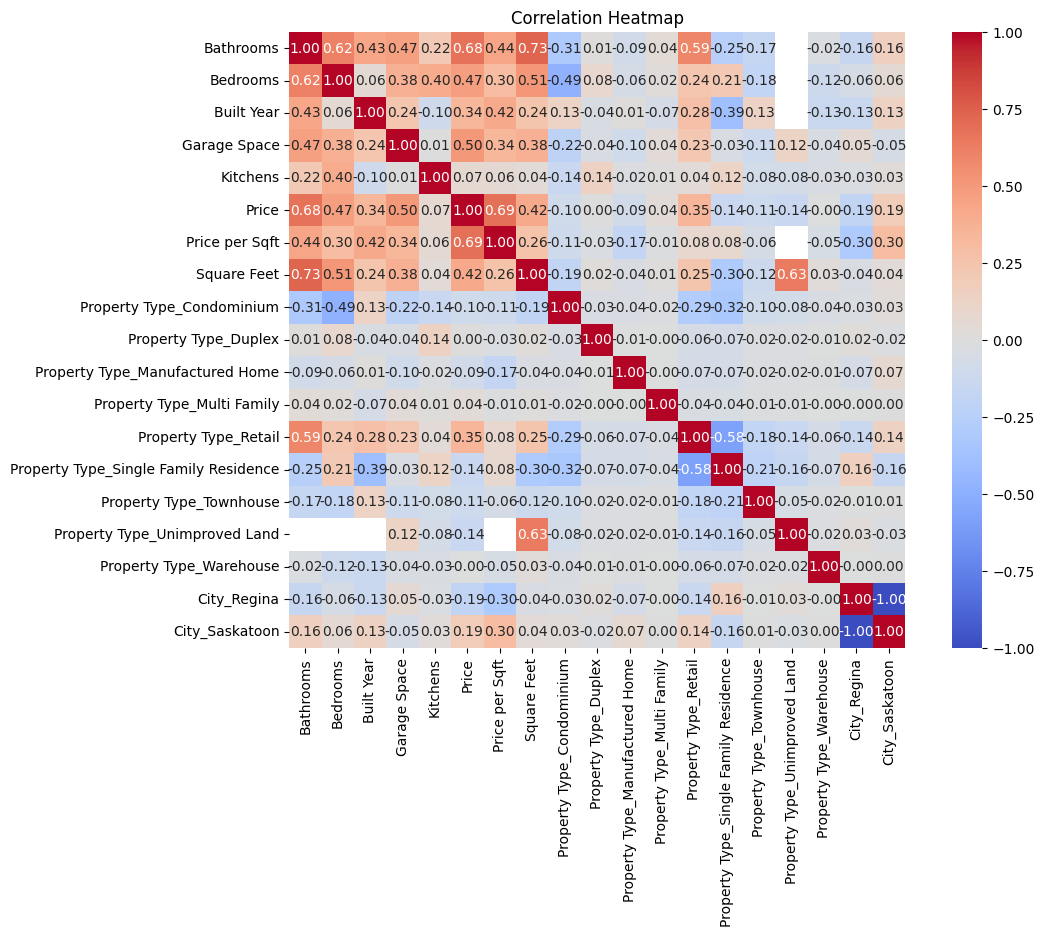

In [291]:
# Calculate the correlation matrix
corr = df.corr()

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

In [292]:
df.head()


,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Price per Sqft,Square Feet,Property Type_Condominium,Property Type_Duplex,Property Type_Manufactured Home,Property Type_Multi Family,Property Type_Retail,Property Type_Single Family Residence,Property Type_Townhouse,Property Type_Unimproved Land,Property Type_Warehouse,City_Regina,City_Saskatoon
0,2.0,3.0,2015.0,2.0,1.0,364900.0,304.0,1200.0,0,0,0,0,1,0,0,0,0,0,1
1,2.0,2.0,2015.0,1.0,1.0,209900.0,238.0,883.0,1,0,0,0,0,0,0,0,0,1,0
2,2.0,3.0,1977.0,2.0,1.0,339900.0,328.0,1036.0,0,0,0,0,0,1,0,0,0,1,0
3,4.0,4.0,1966.0,2.0,1.0,849900.0,256.0,3325.0,0,0,0,0,1,0,0,0,0,1,0
4,2.0,3.0,1962.0,1.0,1.0,324900.0,328.0,992.0,0,0,0,0,0,1,0,0,0,1,0


#**Checking null and empty values**

In [293]:
# Count of nulls (NaN and None)
count_nulls = df.isnull().sum()

# Count of empty strings
count_empty_strings = (df == "").sum()

# Total count of empty strings and nulls
total_missing = count_nulls + count_empty_strings

print("Count of null values:\n", count_nulls)
print("\nCount of empty strings:\n", count_empty_strings)
print("\nTotal count of missing values (nulls + empty strings):\n", total_missing)

Count of null values:
 Bathrooms                                75
Bedrooms                                 75
Built Year                               63
Garage Space                              0
Kitchens                                  0
Price                                     0
Price per Sqft                           75
Square Feet                              14
Property Type_Condominium                 0
Property Type_Duplex                      0
Property Type_Manufactured Home           0
Property Type_Multi Family                0
Property Type_Retail                      0
Property Type_Single Family Residence     0
Property Type_Townhouse                   0
Property Type_Unimproved Land             0
Property Type_Warehouse                   0
City_Regina                               0
City_Saskatoon                            0
dtype: int64

Count of empty strings:
 Bathrooms                                0
Bedrooms                                 0
Built Year      

#**Visualize outlier in price**

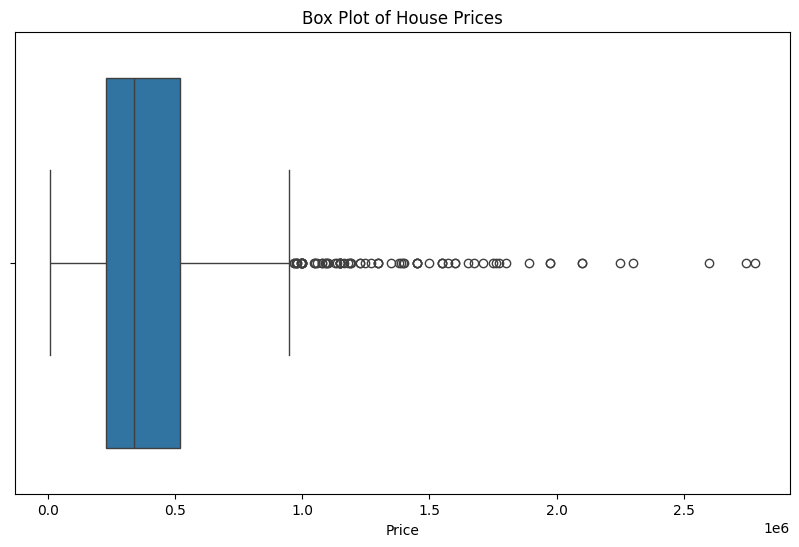

In [294]:
# Create a box plot to visualize outliers in the Price column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])

# Adding labels and title
plt.xlabel("Price")
plt.title("Box Plot of House Prices")

# Show the plot
plt.show()

In [295]:
# Convert Price greater than 2,500,000 to 2,490,000
df.loc[df['Price'] > 2500000, 'Price'] = 2490000

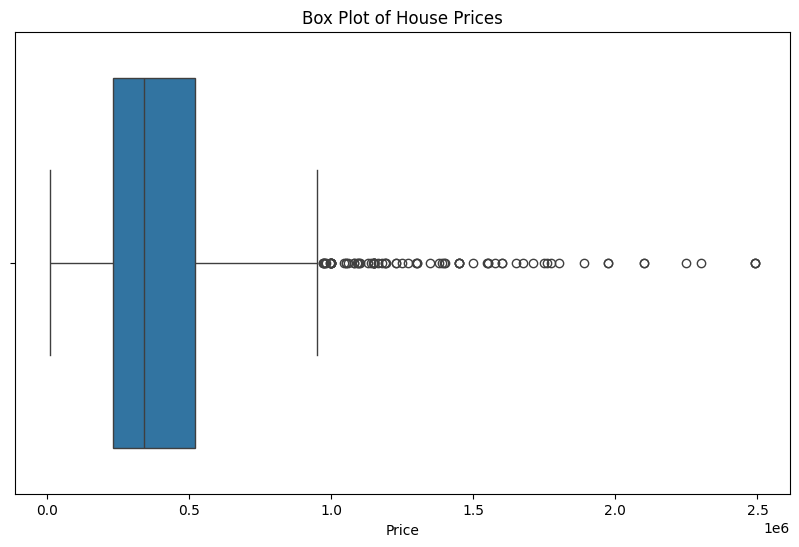

In [296]:
# Create a box plot to visualize outliers in the Price column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])

# Adding labels and title
plt.xlabel("Price")
plt.title("Box Plot of House Prices")

# Show the plot
plt.show()

In [297]:
df.Price.describe()

,Price
count,1.553000e+03
mean,4.173398e+05
std,3.052177e+05
min,9.900000e+03
25%,2.299000e+05
50%,3.399000e+05
75%,5.200000e+05
max,2.490000e+06


In [298]:
print(df.isnull().sum())

Bathrooms                                75
Bedrooms                                 75
Built Year                               63
Garage Space                              0
Kitchens                                  0
Price                                     0
Price per Sqft                           75
Square Feet                              14
Property Type_Condominium                 0
Property Type_Duplex                      0
Property Type_Manufactured Home           0
Property Type_Multi Family                0
Property Type_Retail                      0
Property Type_Single Family Residence     0
Property Type_Townhouse                   0
Property Type_Unimproved Land             0
Property Type_Warehouse                   0
City_Regina                               0
City_Saskatoon                            0
dtype: int64


In [299]:
df["Bathrooms"].mean()

2.3579161028416777

In [300]:
df["Bathrooms"].median()

2.0

In [301]:
df["Bedrooms"].mean()

3.2253044654939105

#**Checking null values in dataframe**

In [302]:
print(df.isnull().sum())

Bathrooms                                75
Bedrooms                                 75
Built Year                               63
Garage Space                              0
Kitchens                                  0
Price                                     0
Price per Sqft                           75
Square Feet                              14
Property Type_Condominium                 0
Property Type_Duplex                      0
Property Type_Manufactured Home           0
Property Type_Multi Family                0
Property Type_Retail                      0
Property Type_Single Family Residence     0
Property Type_Townhouse                   0
Property Type_Unimproved Land             0
Property Type_Warehouse                   0
City_Regina                               0
City_Saskatoon                            0
dtype: int64


In [303]:
df[df['Price'] < 90000]

,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Price per Sqft,Square Feet,Property Type_Condominium,Property Type_Duplex,Property Type_Manufactured Home,Property Type_Multi Family,Property Type_Retail,Property Type_Single Family Residence,Property Type_Townhouse,Property Type_Unimproved Land,Property Type_Warehouse,City_Regina,City_Saskatoon
7,NaN,NaN,NaN,1.0,1.0,49900.0,NaN,6251.0,0,0,0,0,0,0,0,1,0,1,0
10,NaN,NaN,NaN,2.0,1.0,75000.0,NaN,3128.0,0,0,0,0,0,0,0,1,0,1,0
11,NaN,NaN,NaN,2.0,1.0,49900.0,NaN,2827.0,0,0,0,0,0,0,0,1,0,1,0
24,NaN,NaN,NaN,2.0,1.0,79990.0,NaN,3376.0,0,0,0,0,0,0,0,1,0,0,1
84,1.0,2.0,1912.0,1.0,1.0,84900.0,118.000,720.0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,NaN,NaN,NaN,2.0,1.0,72000.0,NaN,6991.0,0,0,0,0,0,0,0,1,0,0,1
1526,NaN,NaN,NaN,2.0,1.0,32000.0,NaN,6752.0,0,0,0,0,0,0,0,1,0,1,0
1538,1.0,2.0,1928.0,1.0,1.0,25000.0,38.125,669.0,0,0,0,0,0,1,0,0,0,1,0
1545,1.0,2.0,1916.0,1.0,1.0,59900.0,94.000,640.0,0,0,0,0,0,1,0,0,0,1,0


In [304]:
# Remove rows where Price is less than 90000
df[df['Price'] >= 90000]

,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Price per Sqft,Square Feet,Property Type_Condominium,Property Type_Duplex,Property Type_Manufactured Home,Property Type_Multi Family,Property Type_Retail,Property Type_Single Family Residence,Property Type_Townhouse,Property Type_Unimproved Land,Property Type_Warehouse,City_Regina,City_Saskatoon
0,2.0,3.0,2015.0,2.0,1.0,364900.0,304.0,1200.0,0,0,0,0,1,0,0,0,0,0,1
1,2.0,2.0,2015.0,1.0,1.0,209900.0,238.0,883.0,1,0,0,0,0,0,0,0,0,1,0
2,2.0,3.0,1977.0,2.0,1.0,339900.0,328.0,1036.0,0,0,0,0,0,1,0,0,0,1,0
3,4.0,4.0,1966.0,2.0,1.0,849900.0,256.0,3325.0,0,0,0,0,1,0,0,0,0,1,0
4,2.0,3.0,1962.0,1.0,1.0,324900.0,328.0,992.0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,3.0,3.0,2014.0,1.0,1.0,364900.0,288.0,1265.0,0,0,0,0,1,0,0,0,0,0,1
1549,2.0,3.0,2013.0,2.0,1.0,599000.0,423.0,1415.0,0,0,0,0,0,1,0,0,0,0,1
1550,2.0,5.0,1957.0,1.0,2.0,310000.0,269.0,1152.0,0,0,0,0,0,1,0,0,0,0,1
1552,2.0,3.0,2013.0,1.0,1.0,209900.0,184.0,1141.0,0,0,0,0,1,0,0,0,0,1,0


In [305]:
df[df['Price'] < 90000]

,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Price per Sqft,Square Feet,Property Type_Condominium,Property Type_Duplex,Property Type_Manufactured Home,Property Type_Multi Family,Property Type_Retail,Property Type_Single Family Residence,Property Type_Townhouse,Property Type_Unimproved Land,Property Type_Warehouse,City_Regina,City_Saskatoon
7,NaN,NaN,NaN,1.0,1.0,49900.0,NaN,6251.0,0,0,0,0,0,0,0,1,0,1,0
10,NaN,NaN,NaN,2.0,1.0,75000.0,NaN,3128.0,0,0,0,0,0,0,0,1,0,1,0
11,NaN,NaN,NaN,2.0,1.0,49900.0,NaN,2827.0,0,0,0,0,0,0,0,1,0,1,0
24,NaN,NaN,NaN,2.0,1.0,79990.0,NaN,3376.0,0,0,0,0,0,0,0,1,0,0,1
84,1.0,2.0,1912.0,1.0,1.0,84900.0,118.000,720.0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,NaN,NaN,NaN,2.0,1.0,72000.0,NaN,6991.0,0,0,0,0,0,0,0,1,0,0,1
1526,NaN,NaN,NaN,2.0,1.0,32000.0,NaN,6752.0,0,0,0,0,0,0,0,1,0,1,0
1538,1.0,2.0,1928.0,1.0,1.0,25000.0,38.125,669.0,0,0,0,0,0,1,0,0,0,1,0
1545,1.0,2.0,1916.0,1.0,1.0,59900.0,94.000,640.0,0,0,0,0,0,1,0,0,0,1,0


In [306]:
df.shape

(1553, 19)

In [307]:
df["Price"].describe()

,Price
count,1.553000e+03
mean,4.173398e+05
std,3.052177e+05
min,9.900000e+03
25%,2.299000e+05
50%,3.399000e+05
75%,5.200000e+05
max,2.490000e+06


In [308]:
print(df.isnull().sum())

Bathrooms                                75
Bedrooms                                 75
Built Year                               63
Garage Space                              0
Kitchens                                  0
Price                                     0
Price per Sqft                           75
Square Feet                              14
Property Type_Condominium                 0
Property Type_Duplex                      0
Property Type_Manufactured Home           0
Property Type_Multi Family                0
Property Type_Retail                      0
Property Type_Single Family Residence     0
Property Type_Townhouse                   0
Property Type_Unimproved Land             0
Property Type_Warehouse                   0
City_Regina                               0
City_Saskatoon                            0
dtype: int64


#**Fillling null values in bathrooms ad bedrooms column with median**

In [309]:
# For numerical columns
# Fill missing values with the median for numerical columns
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].median())
df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].median())

In [310]:
print(df.isnull().sum())

Bathrooms                                 0
Bedrooms                                  0
Built Year                               63
Garage Space                              0
Kitchens                                  0
Price                                     0
Price per Sqft                           75
Square Feet                              14
Property Type_Condominium                 0
Property Type_Duplex                      0
Property Type_Manufactured Home           0
Property Type_Multi Family                0
Property Type_Retail                      0
Property Type_Single Family Residence     0
Property Type_Townhouse                   0
Property Type_Unimproved Land             0
Property Type_Warehouse                   0
City_Regina                               0
City_Saskatoon                            0
dtype: int64


In [311]:
df["Garage Space"].value_counts()

,count
Garage Space,
2.0,743
1.0,688
3.0,74
0.0,48


In [312]:
df = df.dropna(subset=['Built Year'])

In [313]:
print(df.isnull().sum())

Bathrooms                                 0
Bedrooms                                  0
Built Year                                0
Garage Space                              0
Kitchens                                  0
Price                                     0
Price per Sqft                           14
Square Feet                              14
Property Type_Condominium                 0
Property Type_Duplex                      0
Property Type_Manufactured Home           0
Property Type_Multi Family                0
Property Type_Retail                      0
Property Type_Single Family Residence     0
Property Type_Townhouse                   0
Property Type_Unimproved Land             0
Property Type_Warehouse                   0
City_Regina                               0
City_Saskatoon                            0
dtype: int64


In [314]:
df.shape

(1490, 19)

In [315]:
df = df.dropna(subset=['Price per Sqft'])


In [316]:
print(df.isnull().sum())

Bathrooms                                0
Bedrooms                                 0
Built Year                               0
Garage Space                             0
Kitchens                                 0
Price                                    0
Price per Sqft                           0
Square Feet                              0
Property Type_Condominium                0
Property Type_Duplex                     0
Property Type_Manufactured Home          0
Property Type_Multi Family               0
Property Type_Retail                     0
Property Type_Single Family Residence    0
Property Type_Townhouse                  0
Property Type_Unimproved Land            0
Property Type_Warehouse                  0
City_Regina                              0
City_Saskatoon                           0
dtype: int64


In [317]:
df.shape

(1476, 19)

In [318]:
df.head()

,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Price per Sqft,Square Feet,Property Type_Condominium,Property Type_Duplex,Property Type_Manufactured Home,Property Type_Multi Family,Property Type_Retail,Property Type_Single Family Residence,Property Type_Townhouse,Property Type_Unimproved Land,Property Type_Warehouse,City_Regina,City_Saskatoon
0,2.0,3.0,2015.0,2.0,1.0,364900.0,304.0,1200.0,0,0,0,0,1,0,0,0,0,0,1
1,2.0,2.0,2015.0,1.0,1.0,209900.0,238.0,883.0,1,0,0,0,0,0,0,0,0,1,0
2,2.0,3.0,1977.0,2.0,1.0,339900.0,328.0,1036.0,0,0,0,0,0,1,0,0,0,1,0
3,4.0,4.0,1966.0,2.0,1.0,849900.0,256.0,3325.0,0,0,0,0,1,0,0,0,0,1,0
4,2.0,3.0,1962.0,1.0,1.0,324900.0,328.0,992.0,0,0,0,0,0,1,0,0,0,1,0


In [319]:
# Calculate Price per Sqft
df['Price per Sqft'] = df['Price'] / df['Square Feet']

In [320]:
df.head()

,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Price per Sqft,Square Feet,Property Type_Condominium,Property Type_Duplex,Property Type_Manufactured Home,Property Type_Multi Family,Property Type_Retail,Property Type_Single Family Residence,Property Type_Townhouse,Property Type_Unimproved Land,Property Type_Warehouse,City_Regina,City_Saskatoon
0,2.0,3.0,2015.0,2.0,1.0,364900.0,304.083333,1200.0,0,0,0,0,1,0,0,0,0,0,1
1,2.0,2.0,2015.0,1.0,1.0,209900.0,237.712344,883.0,1,0,0,0,0,0,0,0,0,1,0
2,2.0,3.0,1977.0,2.0,1.0,339900.0,328.088803,1036.0,0,0,0,0,0,1,0,0,0,1,0
3,4.0,4.0,1966.0,2.0,1.0,849900.0,255.609023,3325.0,0,0,0,0,1,0,0,0,0,1,0
4,2.0,3.0,1962.0,1.0,1.0,324900.0,327.520161,992.0,0,0,0,0,0,1,0,0,0,1,0


#**Removing price per square feet column as it cant give as input**

In [322]:
# Drop the 'Price per Sqft' column
df = df.drop(columns=['Price per Sqft'])

In [323]:
df.head()

,Bathrooms,Bedrooms,Built Year,Garage Space,Kitchens,Price,Square Feet,Property Type_Condominium,Property Type_Duplex,Property Type_Manufactured Home,Property Type_Multi Family,Property Type_Retail,Property Type_Single Family Residence,Property Type_Townhouse,Property Type_Unimproved Land,Property Type_Warehouse,City_Regina,City_Saskatoon
0,2.0,3.0,2015.0,2.0,1.0,364900.0,1200.0,0,0,0,0,1,0,0,0,0,0,1
1,2.0,2.0,2015.0,1.0,1.0,209900.0,883.0,1,0,0,0,0,0,0,0,0,1,0
2,2.0,3.0,1977.0,2.0,1.0,339900.0,1036.0,0,0,0,0,0,1,0,0,0,1,0
3,4.0,4.0,1966.0,2.0,1.0,849900.0,3325.0,0,0,0,0,1,0,0,0,0,1,0
4,2.0,3.0,1962.0,1.0,1.0,324900.0,992.0,0,0,0,0,0,1,0,0,0,1,0


#**Augmenting data by applying random noise by +- 2000**

In [324]:
import random
# Function to perturb price
def perturb_price(price, perturbation_range=2000):
    return price + random.randint(-perturbation_range, perturbation_range)

# Calculate how many new rows we need
current_count = len(df)
needed_count = 3011
new_rows_needed = needed_count - current_count

# Generate new rows with perturbed prices
new_data = []
for _ in range(new_rows_needed):
    random_row = df.sample(n=1).iloc[0]  # Sample one random row from the original DataFrame
    new_row = random_row.copy()  # Copy the sampled row
    new_row['Price'] = perturb_price(random_row['Price'])  # Change only the price
    new_data.append(new_row)

# Append new data to original DataFrame
df_augmented = pd.concat([df, pd.DataFrame(new_data)], ignore_index=True)

# Check the new shape of the DataFrame
print(df_augmented.shape)  # Should show (3011, number_of_columns)

(3011, 18)


In [325]:
# Display before and after
print("Original Data:")
print(df)
print("\nAugmented Data:")
print(df_augmented)

Original Data:
      Bathrooms  Bedrooms  Built Year  Garage Space  Kitchens     Price  \
0           2.0       3.0      2015.0           2.0       1.0  364900.0   
1           2.0       2.0      2015.0           1.0       1.0  209900.0   
2           2.0       3.0      1977.0           2.0       1.0  339900.0   
3           4.0       4.0      1966.0           2.0       1.0  849900.0   
4           2.0       3.0      1962.0           1.0       1.0  324900.0   
...         ...       ...         ...           ...       ...       ...   
1549        2.0       3.0      2013.0           2.0       1.0  599000.0   
1550        2.0       5.0      1957.0           1.0       2.0  310000.0   
1551        1.0       1.0      1979.0           0.0       1.0   74900.0   
1552        2.0       3.0      2013.0           1.0       1.0  209900.0   
1553        1.0       3.0      1955.0           2.0       1.0  209900.0   

      Square Feet  Property Type_Condominium  Property Type_Duplex  \
0          120

#**Save final dataset**

In [327]:
# Save the augmented DataFrame to a CSV file
df_augmented.to_csv('Cleaned_data.csv', index=False)